In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

import seaborn as sns
import random

import sys
from Bio import Entrez

from scipy.stats import chisquare
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr, spearmanr, f_oneway, ttest_ind

from itertools import cycle

#import SeabornFig2Grid as sfg
import matplotlib.gridspec as gridspec

In [2]:
driver_map_data_all_df = pd.read_csv('../Data/DriverMapTPM.tsv',delimiter='\t')
driver_map_data_all_df = driver_map_data_all_df.set_index('Unnamed: 0')
driver_map_data_all_df.index.names = ['target']
# columns: 
#['A10', 'A11', 'A12', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 
# 'B10', 'B11', 'B12', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9']

# subtract values of negative control from all samples
# not the most pyrhonic way, meh...
driver_map_data_all_df['A2'] = (driver_map_data_all_df['A2']-driver_map_data_all_df['A12'])
driver_map_data_all_df['A3'] = (driver_map_data_all_df['A3']-driver_map_data_all_df['A12'])
driver_map_data_all_df['A4'] = (driver_map_data_all_df['A4']-driver_map_data_all_df['A12'])
driver_map_data_all_df['A5'] = (driver_map_data_all_df['A5']-driver_map_data_all_df['A12'])
driver_map_data_all_df['A6'] = (driver_map_data_all_df['A6']-driver_map_data_all_df['A12'])
driver_map_data_all_df['A7'] = (driver_map_data_all_df['A7']-driver_map_data_all_df['A12'])
driver_map_data_all_df['A8'] = (driver_map_data_all_df['A8']-driver_map_data_all_df['A12'])
driver_map_data_all_df['A9'] = (driver_map_data_all_df['A9']-driver_map_data_all_df['A12'])
driver_map_data_all_df['A10'] = (driver_map_data_all_df['A10']-driver_map_data_all_df['A12'])
driver_map_data_all_df['A12'] = (driver_map_data_all_df['A11']-driver_map_data_all_df['A12'])

driver_map_data_all_df['B2'] = (driver_map_data_all_df['B2']-driver_map_data_all_df['B12'])
driver_map_data_all_df['B3'] = (driver_map_data_all_df['B3']-driver_map_data_all_df['B12'])
driver_map_data_all_df['B4'] = (driver_map_data_all_df['B4']-driver_map_data_all_df['B12'])
driver_map_data_all_df['B5'] = (driver_map_data_all_df['B5']-driver_map_data_all_df['B12'])
driver_map_data_all_df['B6'] = (driver_map_data_all_df['B6']-driver_map_data_all_df['B12'])
driver_map_data_all_df['B7'] = (driver_map_data_all_df['B7']-driver_map_data_all_df['B12'])
driver_map_data_all_df['B8'] = (driver_map_data_all_df['B8']-driver_map_data_all_df['B12'])
driver_map_data_all_df['B9'] = (driver_map_data_all_df['B9']-driver_map_data_all_df['B12'])
driver_map_data_all_df['B10'] = (driver_map_data_all_df['B10']-driver_map_data_all_df['B12'])
driver_map_data_all_df['B12'] = (driver_map_data_all_df['B11']-driver_map_data_all_df['B12'])

driver_map_data_all_df.head()

A10       A11       A12         A2         A3         A4  \
target                                                                       
14266|CENPU  17.60490  23.53280  23.53280   0.294876   43.10860   70.50920   
13331|PEX14  19.08750  14.08670  14.08670  27.671900   25.00070   17.33890   
6630|RAD52    3.66106   4.29017   4.29017   5.274080    6.98958    3.28098   
16802|CLYBL -23.00000  12.58540 -21.88960 -17.580300  -20.19320  -29.54648   
6645|RANBP1  71.64050  79.22280  79.22280  45.997900  218.58800  143.56100   

                   A5        A6        A7        A8  ...       B11       B12  \
target                                               ...                       
14266|CENPU  21.41510   1.14305  47.16210   1.43697  ...  20.49390  20.49390   
13331|PEX14  25.84810  12.43200  18.08010  10.52050  ...  17.62190  17.62190   
6630|RAD52    4.90895   1.53928   5.35737   1.73986  ...   6.29135   2.68903   
16802|CLYBL  -4.10800  -5.53250 -18.95460 -27.22456  ...   9.44277 -29.45763   
6645|RANBP1  82.09650  30.95460  70.32010  51.50090  ...  66.10810  58.72263   

                    B2        B3        B4        B5        B6        B7  \
target                                                                     
14266|CENPU   0.546198  48.08530  74.59220  26.27370   1.19616  45.71820   
13331|PEX14  33.521000  26.23420  24.65790  36.15540  15.84860  18.20870   
6630|RAD52    3.567860   7.23578   2.48444   3.01742  -0.13778   4.39435   
16802|CLYBL -27.730400 -26.60330 -34.02516 -14.43210 -17.51350 -26.89270   
6645|RANBP1  28.094730  97.97153  85.66803  39.27063  17.34733  40.00133   

                   B8         B9  
target                            
14266|CENPU   2.83643  122.24700  
13331|PEX14  14.82460   34.43790  
6630|RAD52   -1.32502    4.68598  
16802|CLYBL -35.08378  -21.97320  
6645|RANBP1  34.52083  110.84353  

[5 rows x 22 columns]

In [3]:
# get log2 values for all DriverMap Samples and save to separate df
with np.errstate(divide='ignore'):
    driver_map_data_all_log_df = np.log2(driver_map_data_all_df)
# replace negative values with 0    
driver_map_data_all_log_df[driver_map_data_all_log_df < 0 ] = 0
# repleca NaN values  with 0
driver_map_data_all_log_df[driver_map_data_all_log_df.isna() ] = 0

# rename column to sample names + sample_BSA
driver_map_data_all_log_df = driver_map_data_all_log_df[['A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 
                                                'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12']]
driver_map_data_all_log_df.columns = ['Brain', 'Univ Stratagene', 'Univ DriverMap','Univ Clontech', 'Univ BioChain', 
                              'Univ Rare', 'WB-Activated','WB-Disease', 'Univ ImmuneT10', 'Hemat System3', 'NegC_B67',
                                 'Brain_BSA', 'Univ Stratagene_BSA', 'Univ DriverMap_BSA','Univ Clontech_BSA', 'Univ BioChain_BSA', 
                              'Univ Rare_BSA', 'WB-Activated_BSA','WB-Disease_BSA', 'Univ ImmuneT10_BSA', 'Hemat System3_BSA', 'NegC_B67_BSA']

driver_map_data_all_log_df.head()

C:\Users\hamst\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log2
  This is separate from the ipykernel package so we can avoid doing imports until


Brain  Univ Stratagene  Univ DriverMap  Univ Clontech  \
target                                                                  
14266|CENPU  0.000000         5.429904        6.139740       4.420557   
13331|PEX14  4.790350         4.643897        4.115940       4.691986   
6630|RAD52   2.398919         2.805206        1.714127       2.295414   
16802|CLYBL  0.000000         0.000000        0.000000       0.000000   
6645|RANBP1  5.523496         7.772070        7.165520       6.359249   

             Univ BioChain  Univ Rare  WB-Activated  WB-Disease  \
target                                                            
14266|CENPU       0.192889   5.559556      0.523030    6.599373   
13331|PEX14       3.635987   4.176331      3.395131    4.872642   
6630|RAD52        0.622256   2.421525      0.798971    2.298957   
16802|CLYBL       0.000000   0.000000      0.000000    0.000000   
6645|RANBP1       4.952082   6.135865      5.686526    7.072577   

             Univ ImmuneT10  Hemat System3  ...  Univ Stratagene_BSA  \
target                                      ...                        
14266|CENPU        4.137905       4.556601  ...             5.587524   
13331|PEX14        4.254556       3.816262  ...             4.713377   
6630|RAD52         1.872261       2.101035  ...             2.855149   
16802|CLYBL        0.000000       3.653679  ...             0.000000   
6645|RANBP1        6.162704       6.307844  ...             6.614291   

             Univ DriverMap_BSA  Univ Clontech_BSA  Univ BioChain_BSA  \
target                                                                  
14266|CENPU            6.220953           4.715547           0.258410   
13331|PEX14            4.623978           5.176139           3.986283   
6630|RAD52             1.312921           1.593316           0.000000   
16802|CLYBL            0.000000           0.000000           0.000000   
6645|RANBP1            6.420685           5.295379           4.116642   

             Univ Rare_BSA  WB-Activated_BSA  WB-Disease_BSA  \
target                                                         
14266|CENPU       5.514697          1.504076        6.933655   
13331|PEX14       4.186556          3.889921        5.105925   
6630|RAD52        2.135650          0.000000        2.228351   
16802|CLYBL       0.000000          0.000000        0.000000   
6645|RANBP1       5.321976          5.109395        6.792381   

             Univ ImmuneT10_BSA  Hemat System3_BSA  NegC_B67_BSA  
target                                                            
14266|CENPU            3.763751           4.357123      4.357123  
13331|PEX14            4.458284           4.139298      4.139298  
6630|RAD52             1.928363           2.653370      1.427086  
16802|CLYBL            0.000000           3.239210      0.000000  
6645|RANBP1            5.064388           6.046755      5.875845  

[5 rows x 22 columns]

In [4]:
# create separate file for DriverMap Original Samples
driver_map_data_df = driver_map_data_all_df.iloc[::,]
driver_map_data_df = driver_map_data_df[['A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12']]
driver_map_data_df.columns = ['Brain', 'Univ Stratagene', 'Univ DriverMap','Univ Clontech', 'Univ BioChain', 
                              'Univ Rare', 'WB-Activated','WB-Disease', 'Univ ImmuneT10', 'Hemat System3', 'NegC_B67']

driver_map_data_df.reset_index(drop=False)
driver_map_data_df.head()

Brain  Univ Stratagene  Univ DriverMap  Univ Clontech  \
target                                                                   
14266|CENPU   0.294876         43.10860        70.50920       21.41510   
13331|PEX14  27.671900         25.00070        17.33890       25.84810   
6630|RAD52    5.274080          6.98958         3.28098        4.90895   
16802|CLYBL -17.580300        -20.19320       -29.54648       -4.10800   
6645|RANBP1  45.997900        218.58800       143.56100       82.09650   

             Univ BioChain  Univ Rare  WB-Activated  WB-Disease  \
target                                                            
14266|CENPU        1.14305   47.16210       1.43697    96.96370   
13331|PEX14       12.43200   18.08010      10.52050    29.29620   
6630|RAD52         1.53928    5.35737       1.73986     4.92102   
16802|CLYBL       -5.53250  -18.95460     -27.22456   -16.07510   
6645|RANBP1       30.95460   70.32010      51.50090   134.60400   

             Univ ImmuneT10  Hemat System3  NegC_B67  
target                                                
14266|CENPU        17.60490       23.53280  23.53280  
13331|PEX14        19.08750       14.08670  14.08670  
6630|RAD52          3.66106        4.29017   4.29017  
16802|CLYBL       -23.00000       12.58540 -21.88960  
6645|RANBP1        71.64050       79.22280  79.22280

In [5]:
# take log2 of the original and ignote devide by 0 error message
with np.errstate(divide='ignore'):
    driver_map_data_log_df = np.log2(driver_map_data_df)

# replace negative values with 0    
driver_map_data_log_df[driver_map_data_log_df < 0 ] = 0
# repleca NaN values  with 0
driver_map_data_log_df[driver_map_data_log_df.isna() ] = 0

#flip axis
switch_driver_map_data_log_df=driver_map_data_log_df.transpose()

switch_driver_map_data_log_df.to_csv('../Outputs/DM_data_log_original.csv')
driver_map_data_log_df.describe()

C:\Users\hamst\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log2
  This is separate from the ipykernel package so we can avoid doing imports until


Brain  Univ Stratagene  Univ DriverMap  Univ Clontech  \
count  18989.000000     18989.000000    18989.000000   18989.000000   
mean       2.450877         2.341570        2.277876       2.601848   
std        2.757712         2.735929        2.746211       2.677327   
min        0.000000         0.000000        0.000000       0.000000   
25%        0.000000         0.000000        0.000000       0.000000   
50%        1.328888         0.916515        0.462576       2.141665   
75%        4.716415         4.531874        4.434255       4.736572   
max       15.099557        13.193981       12.993463      13.537405   

       Univ BioChain     Univ Rare  WB-Activated    WB-Disease  \
count   18989.000000  18989.000000  18989.000000  18989.000000   
mean        1.718796      2.514292      1.844932      2.172167   
std         2.409164      2.653809      2.625718      2.765882   
min         0.000000      0.000000      0.000000      0.000000   
25%         0.000000      0.000000      0.000000      0.000000   
50%         0.000000      1.984177      0.000000      0.000000   
75%         3.255569      4.619935      3.617381      4.376686   
max        15.564708     13.854684     14.635486     13.602317   

       Univ ImmuneT10  Hemat System3      NegC_B67  
count    18989.000000   18989.000000  18989.000000  
mean         2.332660       2.953104      2.099377  
std          2.622364       2.558000      2.590547  
min          0.000000       0.000000      0.000000  
25%          0.000000       0.124169      0.000000  
50%          1.467566       2.803502      0.593249  
75%          4.308055       4.807824      3.984972  
max         14.502770      14.745118     14.736447

In [6]:
# Make DF for DriverMap for samples treated with BSA and 
driver_map_data_bsa_df = driver_map_data_all_df.iloc[::,-12:]
driver_map_data_bsa_df = driver_map_data_bsa_df[['B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12']]
driver_map_data_bsa_df.columns = ['Brain', 'Univ Stratagene', 'Univ DriverMap','Univ Clontech', 'Univ BioChain', 
                              'Univ Rare', 'WB-Activated','WB-Disease', 'Univ ImmuneT10', 'Hemat System3', 'NegC_B67']

#driver_map_data_bsa_df.reset_index(drop=False)

# convert DriverMap data into log2 functions and ignote devide by 0 error message
with np.errstate(divide='ignore'):
    driver_map_data_bsa_log_df = driver_map_data_bsa_df.apply(np.log2, reduce=None)

# replace negative values with 0    
driver_map_data_bsa_log_df[driver_map_data_bsa_log_df < 0 ] = 0
# replace NaN values with 0  
driver_map_data_bsa_log_df[driver_map_data_bsa_log_df.isna() ] = 0

    
#flip axis
switch_driver_map_data_bsa_log_df=driver_map_data_bsa_log_df.transpose()

switch_driver_map_data_bsa_log_df.to_csv('../Outputs/DM_data_log_BSA.csv')
driver_map_data_bsa_log_df.describe()

Brain  Univ Stratagene  Univ DriverMap  Univ Clontech  \
count  18989.000000     18989.000000    18989.000000   18989.000000   
mean       2.333438         2.365323        2.287656       2.576819   
std        2.732538         2.768558        2.776789       2.710640   
min        0.000000         0.000000        0.000000       0.000000   
25%        0.000000         0.000000        0.000000       0.000000   
50%        0.835730         0.791614        0.161062       2.015426   
75%        4.569983         4.641893        4.553981       4.773020   
max       16.015493        12.968098       12.960174      14.101352   

       Univ BioChain     Univ Rare  WB-Activated    WB-Disease  \
count   18989.000000  18989.000000  18989.000000  18989.000000   
mean        1.680702      2.466919      1.794205      2.189244   
std         2.408567      2.673944      2.614511      2.785213   
min         0.000000      0.000000      0.000000      0.000000   
25%         0.000000      0.000000      0.000000      0.000000   
50%         0.000000      1.773342      0.000000      0.000000   
75%         3.198973      4.619924      3.523926      4.457430   
max        15.632455     14.480078     14.581995     13.203096   

       Univ ImmuneT10  Hemat System3      NegC_B67  
count    18989.000000   18989.000000  18989.000000  
mean         2.326057       3.087275      2.149791  
std          2.647871       2.563306      2.627872  
min          0.000000       0.000000      0.000000  
25%          0.000000       0.332473      0.000000  
50%          1.304704       3.036254      0.487692  
75%          4.377839       4.967634      4.151526  
max         15.196160      14.764224     14.757696

In [7]:
driver_map_data_all_df = driver_map_data_all_df[['A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 
                                                'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12']]
driver_map_data_all_df.columns = ['Brain', 'Univ Stratagene', 'Univ DriverMap','Univ Clontech', 'Univ BioChain', 
                              'Univ Rare', 'WB-Activated','WB-Disease', 'Univ ImmuneT10', 'Hemat System3', 'NegC_B67',
                                 'Brain_BSA', 'Univ Stratagene_BSA', 'Univ DriverMap_BSA','Univ Clontech_BSA', 'Univ BioChain_BSA', 
                              'Univ Rare_BSA', 'WB-Activated_BSA','WB-Disease_BSA', 'Univ ImmuneT10_BSA', 'Hemat System3_BSA', 'NegC_B67_BSA']



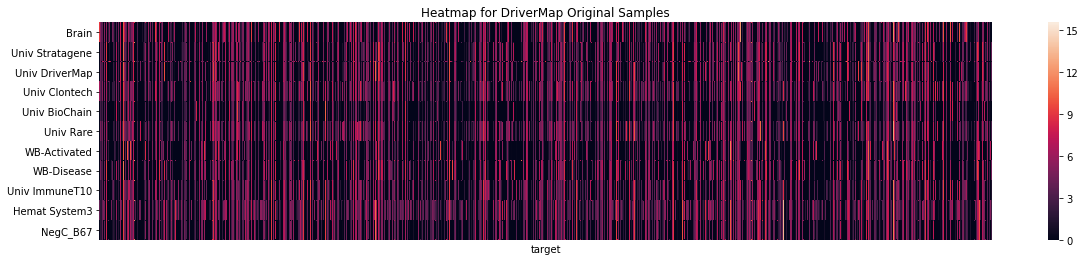

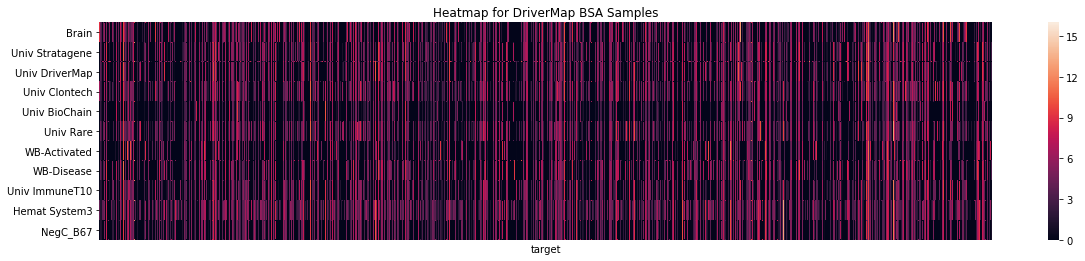

In [8]:
# make heatmap of DriverMap Original Samples
plt.figure(figsize=(20,4))
sns.heatmap(switch_driver_map_data_log_df,xticklabels=False,yticklabels=True)
plt.title('Heatmap for DriverMap Original Samples')
plt.savefig("Figures_NegC/heatmap_Original.png", dpi = 200)

# make heatmap of DriverMap BSA Samples
plt.figure(figsize=(20,4))
sns.heatmap(switch_driver_map_data_bsa_log_df,xticklabels=False,yticklabels=True)
plt.title('Heatmap for DriverMap BSA Samples')
plt.savefig("Figures_NegC/heatmap_BSA.png", dpi = 200)


In [9]:
# getting the list of genes
unique_genes_split = driver_map_data_df.index.str.split('|')
gene_name_list = [unique_genes_split[i][1] for i in range(len(unique_genes_split))]

#confirm that all gene names are unique
gene_name_list = [unique_genes_split[i][1] for i in range(len(unique_genes_split))]
len(np.unique(gene_name_list)) # 18989

# convert gene list to gene string separated by "," and export to file
gene_string = " ".join(str(x) for x in gene_name_list)
gene_string = gene_string.replace("[", "")
gene_string = gene_string.replace("]", ",")
gene_string = gene_string.replace("'", "")


In [10]:
bins = [-1,0,4,7,17]
bin_labels = ['no read','low','medium','high']

def bin_logs(df):
    
    # Make empty dictionary to fill with column cut in bins
    bin_data = {}
    # Make empty dictionary to fill with count of genes per bin
    bin_group = {}
    
    for i in list(df.columns):
        bin_data[i] = pd.cut(df[i],bins,labels=bin_labels)
    
    # Make temporary df with binned data
    bin_dataf = pd.DataFrame.from_dict(bin_data)
    
    # Make df with counts of gene grouped by bin
    for j in list(bin_dataf.columns):
        gr_count = bin_dataf.groupby(j)[j].count()
        bin_group[j] = gr_count
    
    return pd.DataFrame.from_dict(bin_group)

In [11]:
# rearrange samples original and BSA next to yeach other on big graph
driver_map_data_all_log_df = driver_map_data_all_log_df[['Brain', 'Brain_BSA',
                                         'Univ Stratagene', 'Univ Stratagene_BSA',
                                         'Univ DriverMap','Univ DriverMap_BSA',
                                         'Univ Clontech', 'Univ Clontech_BSA',
                                         'Univ BioChain', 'Univ BioChain_BSA',
                                         'Univ Rare', 'Univ Rare_BSA',
                                         'WB-Activated', 'WB-Activated_BSA',
                                         'WB-Disease', 'WB-Disease_BSA',
                                         'Univ ImmuneT10', 'Univ ImmuneT10_BSA',
                                         'Hemat System3', 'Hemat System3_BSA',
                                         'NegC_B67','NegC_B67_BSA']]

binned_all_dm_data = bin_logs(driver_map_data_all_log_df)
binned_all_dm_data

Brain  Brain_BSA  Univ Stratagene  Univ Stratagene_BSA  \
no read   8559       9002             8807                 8982   
low       4416       4272             4500                 4149   
medium    4658       4442             4405                 4528   
high      1356       1273             1277                 1330   

         Univ DriverMap  Univ DriverMap_BSA  Univ Clontech  Univ Clontech_BSA  \
no read            9220                9405           7415               7794   
low                4293                3974           5334               4918   
medium             4167                4257           5002               4996   
high               1309                1353           1238               1281   

         Univ BioChain  Univ BioChain_BSA  ...  WB-Activated  \
no read          10181              10525  ...         10672   
low               5150               4858  ...          4061   
medium            2941               2916  ...          3175   
high               717                690  ...          1081   

         WB-Activated_BSA  WB-Disease  WB-Disease_BSA  Univ ImmuneT10  \
no read             10968        9885            9966            8179   
low                  3876        3763            3620            5484   
medium               3099        4044            4036            4257   
high                 1046        1297            1367            1069   

         Univ ImmuneT10_BSA  Hemat System3  Hemat System3_BSA  NegC_B67  \
no read                8483           4606               4379      9013   
low                    5053           7768               7474      5256   
medium                 4356           5345               5801      3737   
high                   1097           1270               1335       983   

         NegC_B67_BSA  
no read          9151  
low              4827  
medium           3983  
high             1028  

[4 rows x 22 columns]

In [12]:
binned_dm_data = bin_logs(driver_map_data_log_df)
binned_dm_data

Brain  Univ Stratagene  Univ DriverMap  Univ Clontech  Univ BioChain  \
no read   8559             8807            9220           7415          10181   
low       4416             4500            4293           5334           5150   
medium    4658             4405            4167           5002           2941   
high      1356             1277            1309           1238            717   

         Univ Rare  WB-Activated  WB-Disease  Univ ImmuneT10  Hemat System3  \
no read       7678         10672        9885            8179           4606   
low           5311          4061        3763            5484           7768   
medium        4851          3175        4044            4257           5345   
high          1149          1081        1297            1069           1270   

         NegC_B67  
no read      9013  
low          5256  
medium       3737  
high          983

In [13]:
binned_bsa_data = bin_logs(driver_map_data_bsa_log_df)
binned_bsa_data

Brain  Univ Stratagene  Univ DriverMap  Univ Clontech  Univ BioChain  \
no read   9002             8982            9405           7794          10525   
low       4272             4149            3974           4918           4858   
medium    4442             4528            4257           4996           2916   
high      1273             1330            1353           1281            690   

         Univ Rare  WB-Activated  WB-Disease  Univ ImmuneT10  Hemat System3  \
no read       8060         10968        9966            8483           4379   
low           4988          3876        3620            5053           7474   
medium        4801          3099        4036            4356           5801   
high          1140          1046        1367            1097           1335   

         NegC_B67  
no read      9151  
low          4827  
medium       3983  
high         1028

In [14]:
def bin_logs_df(df):
    
    # Make empty dictionary to fill with column cut in bins
    bin_data = {}
    # Make empty dictionary to fill with count of genes per bin
    bin_group = {}
    
    for i in list(df.columns):
        bin_data[i] = pd.cut(df[i],bins,labels=bin_labels)
    
    # Make temporary df with binned data
    bin_dataf = pd.DataFrame.from_dict(bin_data)
    
    # Make df with counts of gene grouped by bin
#    for j in list(bin_dataf.columns):
#        gr_count = bin_dataf.groupby(j)[j].count()
#        bin_group[j] = gr_count
    
    return bin_dataf

bin_df = bin_logs_df(driver_map_data_all_log_df)

bin_df.head()
bin_df.index

Index(['14266|CENPU', '13331|PEX14', '6630|RAD52', '16802|CLYBL',
       '6645|RANBP1', '12149|KDF1', '11733|TBC1D30', '14535|TMEM258',
       '12400|LRG1', '11931|HYAL1',
       ...
       '16176|GAB3', '13299|ZNF701', '5706|NEB', '15110|ZNF775', '3181|CCNB2',
       '16735|BBS12', '14784|ANKRD27', '3464|COL19A1', '10238|TCTA',
       '10545|CA5A'],
      dtype='object', name='target', length=18989)

In [15]:
# get names of genes for the high expression

brain_high = bin_df.loc[bin_df['Brain'] == 'high'].index.to_list()
brain_index_high = []
grrr = [brain_index_high.append(i) for i in brain_high]

#brain_index_high # highly expressed gene count in brain is 1356

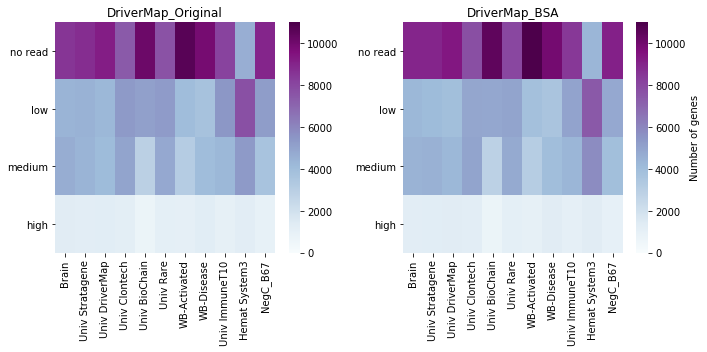

In [16]:
fig = plt.figure(figsize = (10,5)) 
ax1 = fig.add_subplot(1, 2, 1) 
ax2 = fig.add_subplot(1, 2, 2)

sns.heatmap(binned_dm_data, cmap = 'BuPu', ax = ax1, vmin=0, vmax=11000) 
plt.setp(ax1.yaxis.get_majorticklabels(), rotation = 0)
ax1.set_title('DriverMap_Original')
plt.savefig("Figures_NegC/heatmap_Original_bins.png", dpi = 200)

sns.heatmap(binned_bsa_data, cmap = 'BuPu', ax = ax2, vmin=0, vmax=11000, cbar_kws = {'label':'Number of genes'})
plt.setp(ax2.yaxis.get_majorticklabels(), rotation = 0)
ax2.set_title('DriverMap_BSA')
plt.savefig("Figures_NegC/heatmap_BSA_bins.png", dpi = 200)

plt.tight_layout()

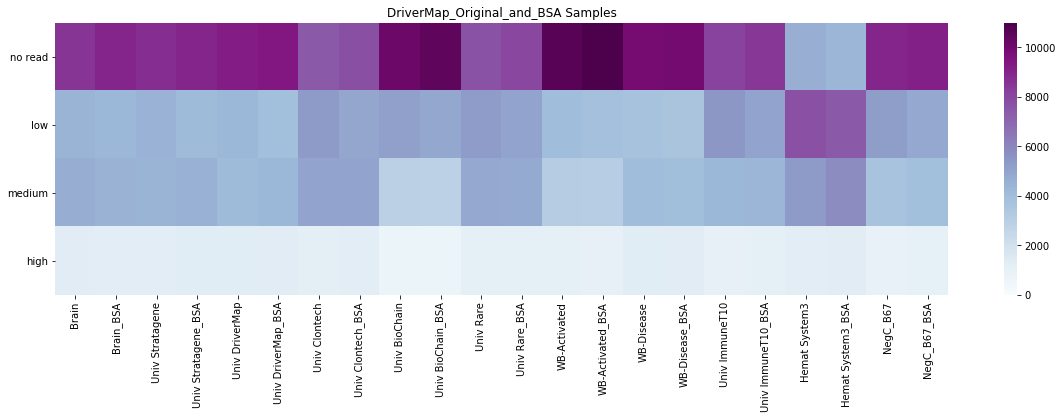

In [17]:
# create histogram plot with side by side comparison of original and BSA samples
fig = plt.figure(figsize = (20,5)) 
ax1 = fig.add_subplot(1, 1, 1) 

sns.heatmap(binned_all_dm_data, cmap = 'BuPu', ax = ax1, vmin=0, vmax=11000) 
plt.setp(ax1.yaxis.get_majorticklabels(), rotation = 0)
ax1.set_title('DriverMap_Original_and_BSA Samples')
plt.savefig("Figures_NegC/heatmap_Original_and_BSA.png", dpi = 200)

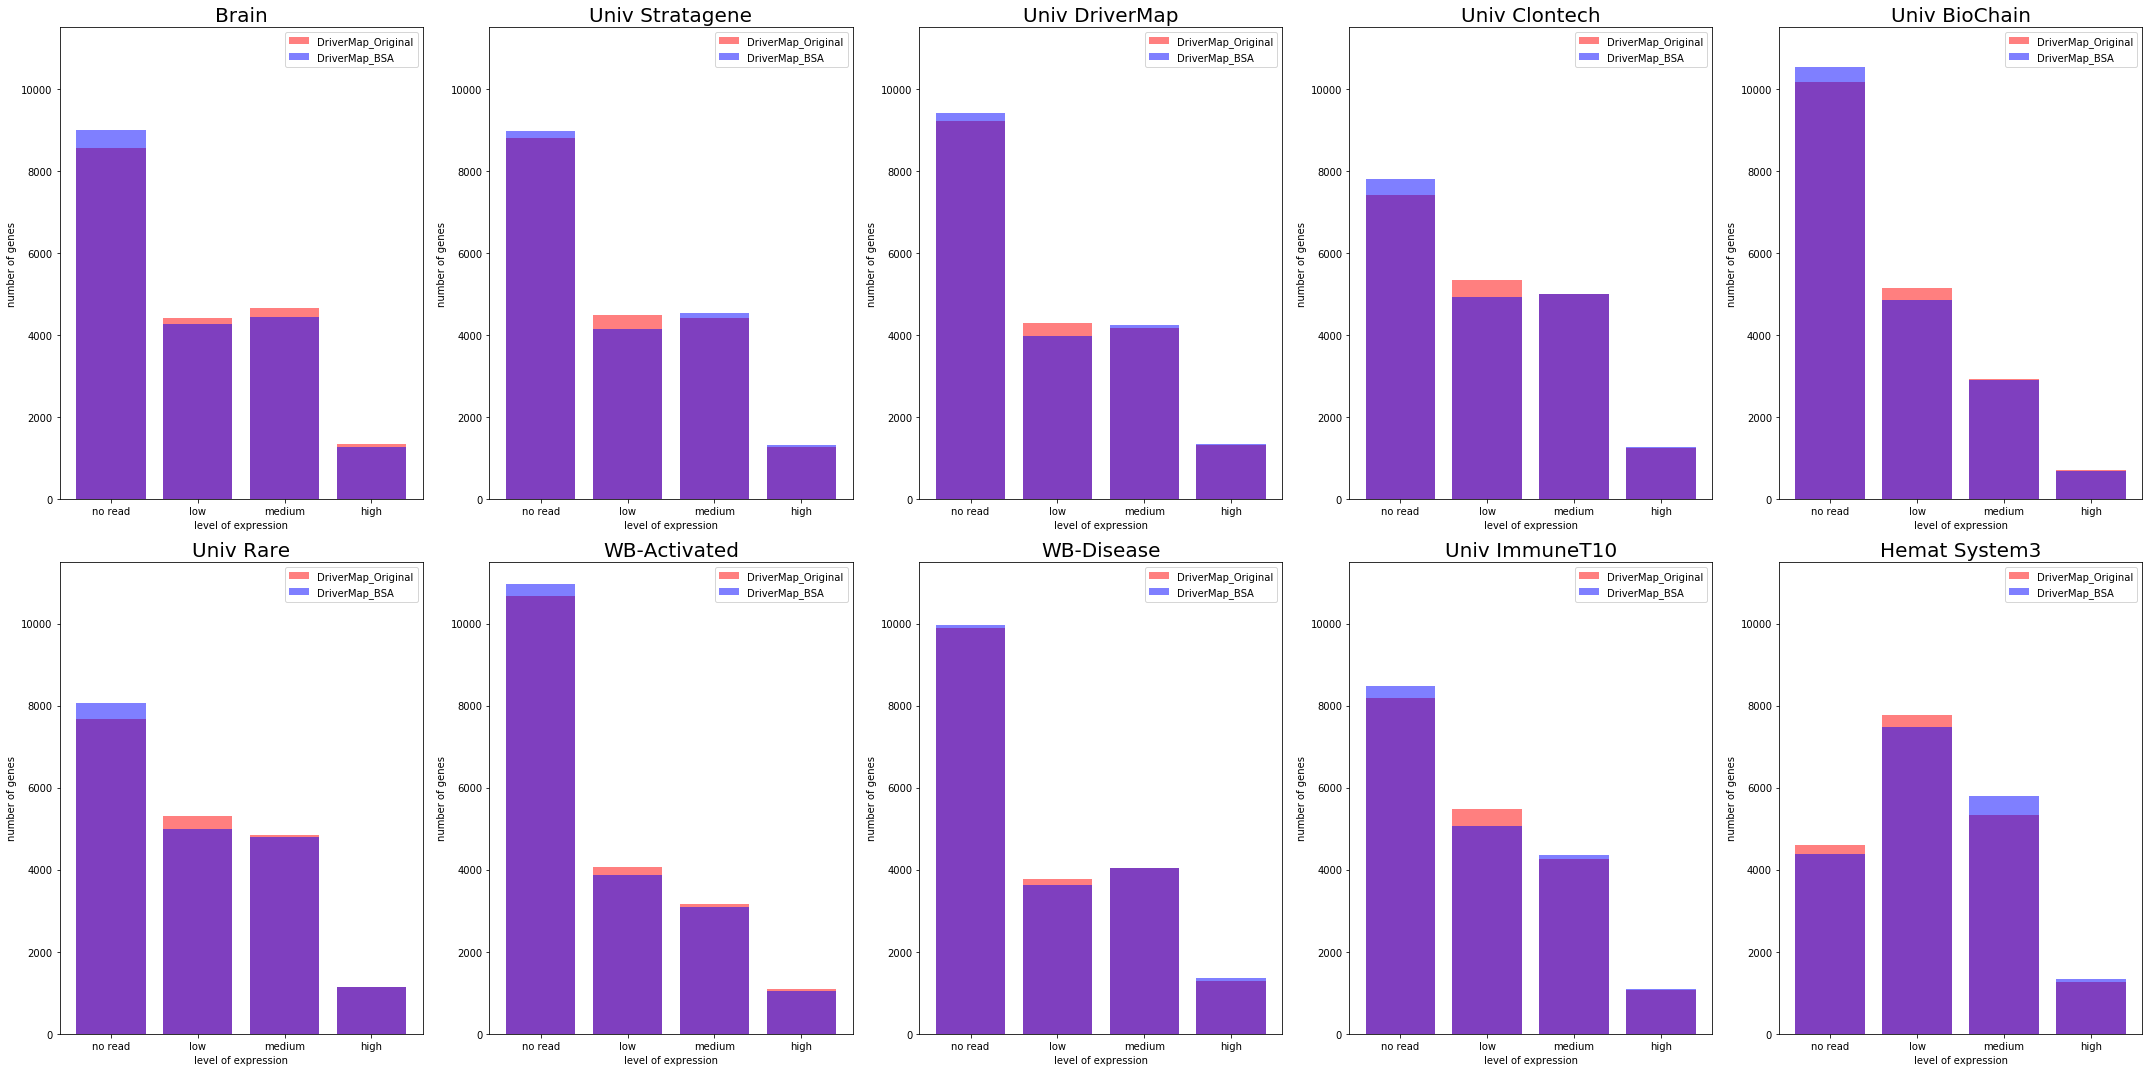

In [18]:
plt.figure(figsize=(30,15))

for i in range(10):
    title_font = {'size':'20'}
    plt.subplot(2,5,i+1)
    plt.bar(x = binned_dm_data.index, height = binned_dm_data.iloc[:,i], alpha=0.5, color='red',label='DriverMap_Original')
    plt.bar(x = binned_bsa_data.index, height = binned_bsa_data.iloc[:,i], alpha=0.5, color='blue',label='DriverMap_BSA')
    plt.title(binned_dm_data.columns[i],**title_font)
    plt.xlabel('level of expression')
    plt.ylabel('number of genes')
    plt.ylim(0, 11500)
    plt.legend()
    
plt.tight_layout()
plt.savefig("Figures_NegC/bars_Original_and_BSA.png", dpi = 200)

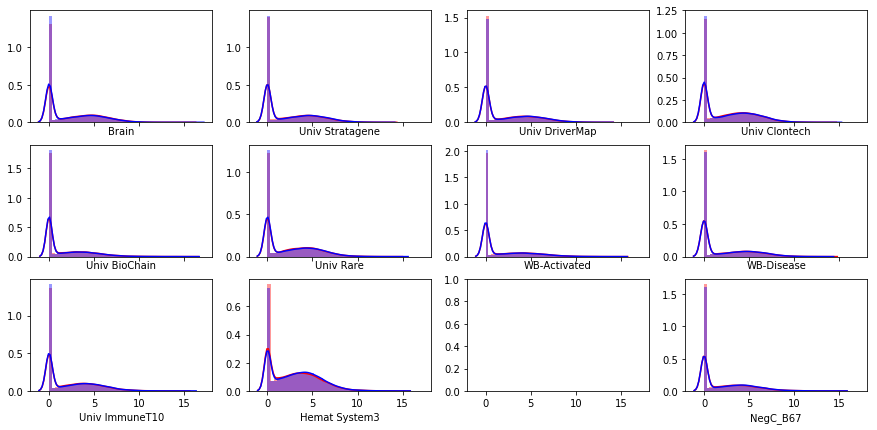

In [19]:
#This function combines the matplotlib hist function (with automatic calculation of a good default bin size) 
#with the seaborn kdeplot() and rugplot() functions. 
#It can also fit scipy.stats distributions and plot the estimated PDF over the data.
f, axes = plt.subplots(3, 4, figsize=(15, 7), sharex=True)

ax = sns.distplot( driver_map_data_log_df['Brain'] , color="red", ax=axes[0, 0])
ax = sns.distplot( driver_map_data_bsa_log_df['Brain'] , color="blue", ax=axes[0, 0])
ax = sns.distplot( driver_map_data_log_df['Univ Stratagene'] , color="red", ax=axes[0, 1])
ax = sns.distplot( driver_map_data_bsa_log_df['Univ Stratagene'] , color="blue", ax=axes[0, 1])
ax = sns.distplot( driver_map_data_log_df['Univ DriverMap'] , color="red", ax=axes[0, 2])
ax = sns.distplot( driver_map_data_bsa_log_df['Univ DriverMap'] , color="blue", ax=axes[0, 2])
ax = sns.distplot( driver_map_data_log_df['Univ Clontech'] , color="red", ax=axes[0, 3])
ax = sns.distplot( driver_map_data_bsa_log_df['Univ Clontech'] , color="blue", ax=axes[0, 3])
ax = sns.distplot( driver_map_data_log_df['Univ BioChain'] , color="red", ax=axes[1, 0])
ax = sns.distplot( driver_map_data_bsa_log_df['Univ BioChain'] , color="blue", ax=axes[1, 0])
ax = sns.distplot( driver_map_data_log_df['Univ Rare'] , color="red", ax=axes[1, 1])
ax = sns.distplot( driver_map_data_bsa_log_df['Univ Rare'] , color="blue", ax=axes[1, 1])
ax = sns.distplot( driver_map_data_log_df['WB-Activated'] , color="red", ax=axes[1, 2])
ax = sns.distplot( driver_map_data_bsa_log_df['WB-Activated'] , color="blue", ax=axes[1, 2])
ax = sns.distplot( driver_map_data_log_df['WB-Disease'] , color="red", ax=axes[1, 3])
ax = sns.distplot( driver_map_data_bsa_log_df['WB-Disease'] , color="blue", ax=axes[1, 3])
ax = sns.distplot( driver_map_data_log_df['Univ ImmuneT10'] , color="red", ax=axes[2, 0])
ax = sns.distplot( driver_map_data_bsa_log_df['Univ ImmuneT10'] , color="blue", ax=axes[2, 0])
ax = sns.distplot( driver_map_data_log_df['Hemat System3'] , color="red", ax=axes[2, 1])
ax = sns.distplot( driver_map_data_bsa_log_df['Hemat System3'] , color="blue", ax=axes[2, 1])
ax = sns.distplot( driver_map_data_log_df['NegC_B67'] , color="red", ax=axes[2, 3])
ax = sns.distplot( driver_map_data_bsa_log_df['NegC_B67'] , color="blue", ax=axes[2, 3])

f.savefig("Figures_NegC/distplot_overlaps.png", dpi = 200)

In [20]:
# another possible way to normalize data

#log2df = np.log2(my_df)
#log2mean = log2df.mean(axis='columns')
#log_div_ave = log2df.subtract(log2mean, axis='index')



In [21]:
# Function to calculate correlation coefficient between two arrays
def corr(x, y, **kwargs):
    
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.95), size = 20, xycoords = ax.transAxes)

About PairGrid Plots
The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.

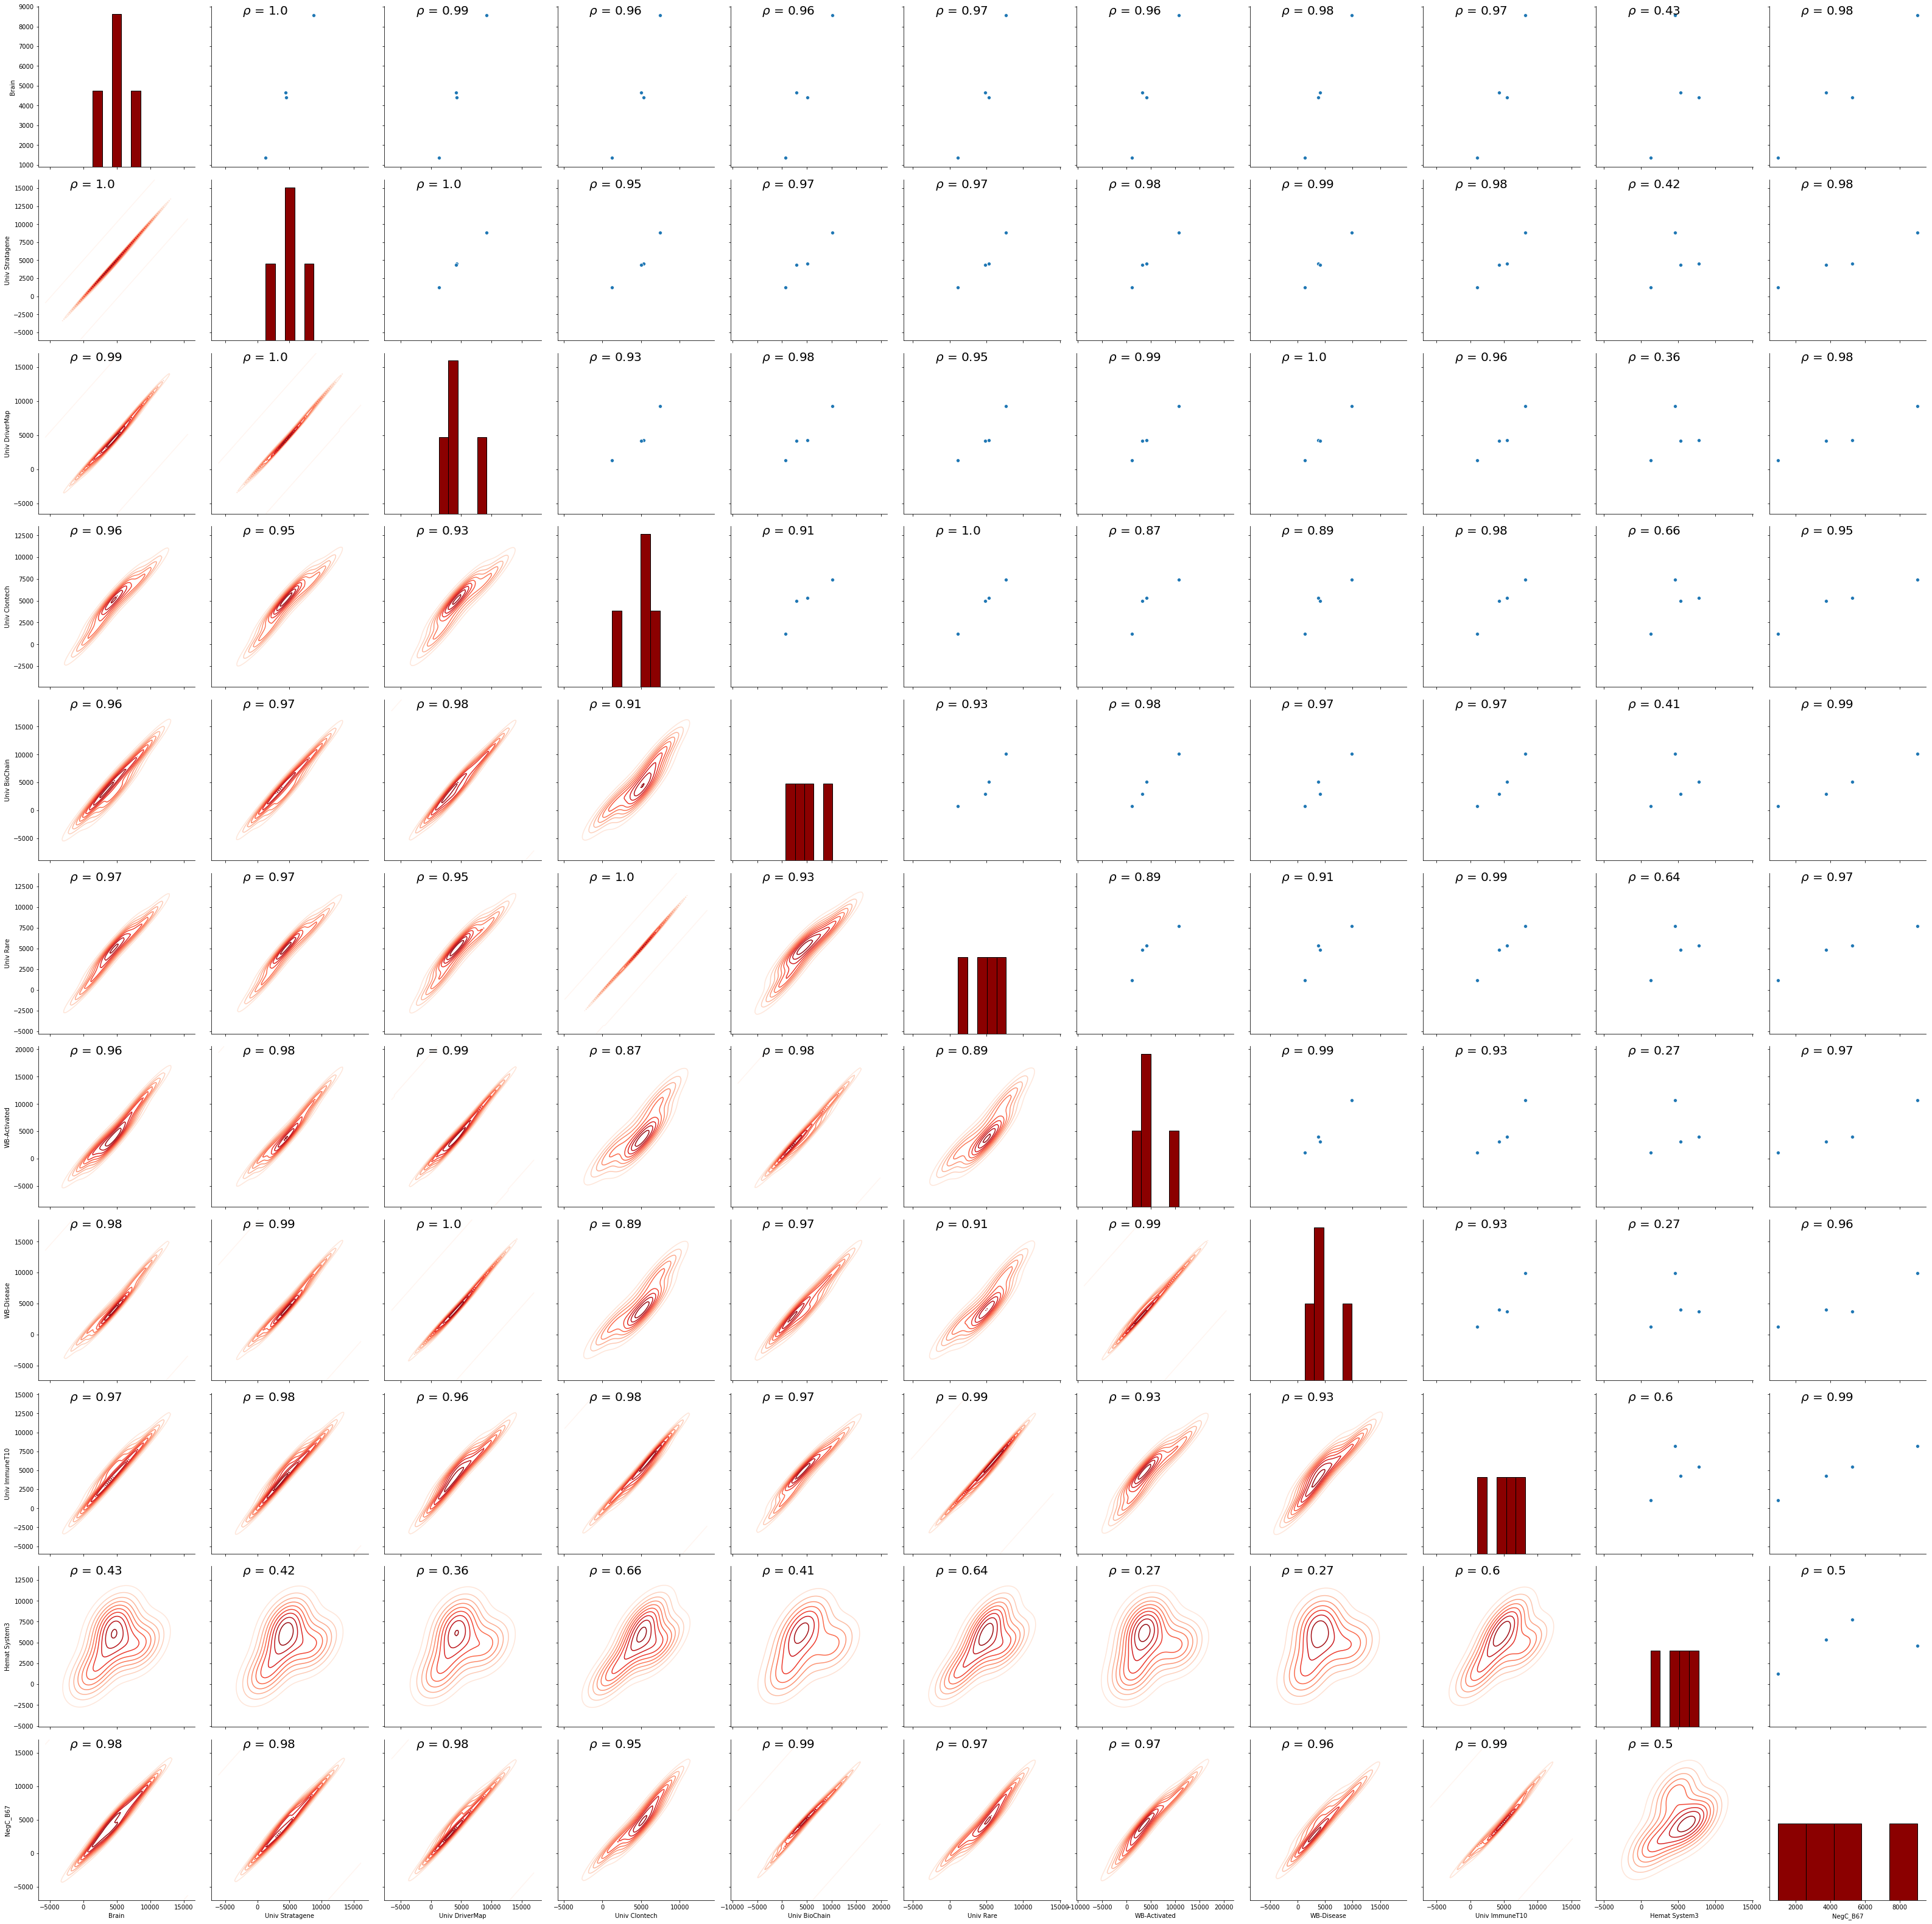

In [22]:
# Create a pair grid instance for Original binned Samples
grid = sns.PairGrid(data= binned_dm_data, height = 4)

# Map the plots to the locations
grid = grid.map_upper(sns.scatterplot, cmap = 'darkred')
grid = grid.map_upper(corr)
grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')
grid = grid.map_lower(corr)
grid = grid.map_diag(plt.hist, bins = 5, edgecolor =  'k', color = 'darkred');
grid.savefig("Figures_NegC/grid_Original_bins.png", dpi = 200)

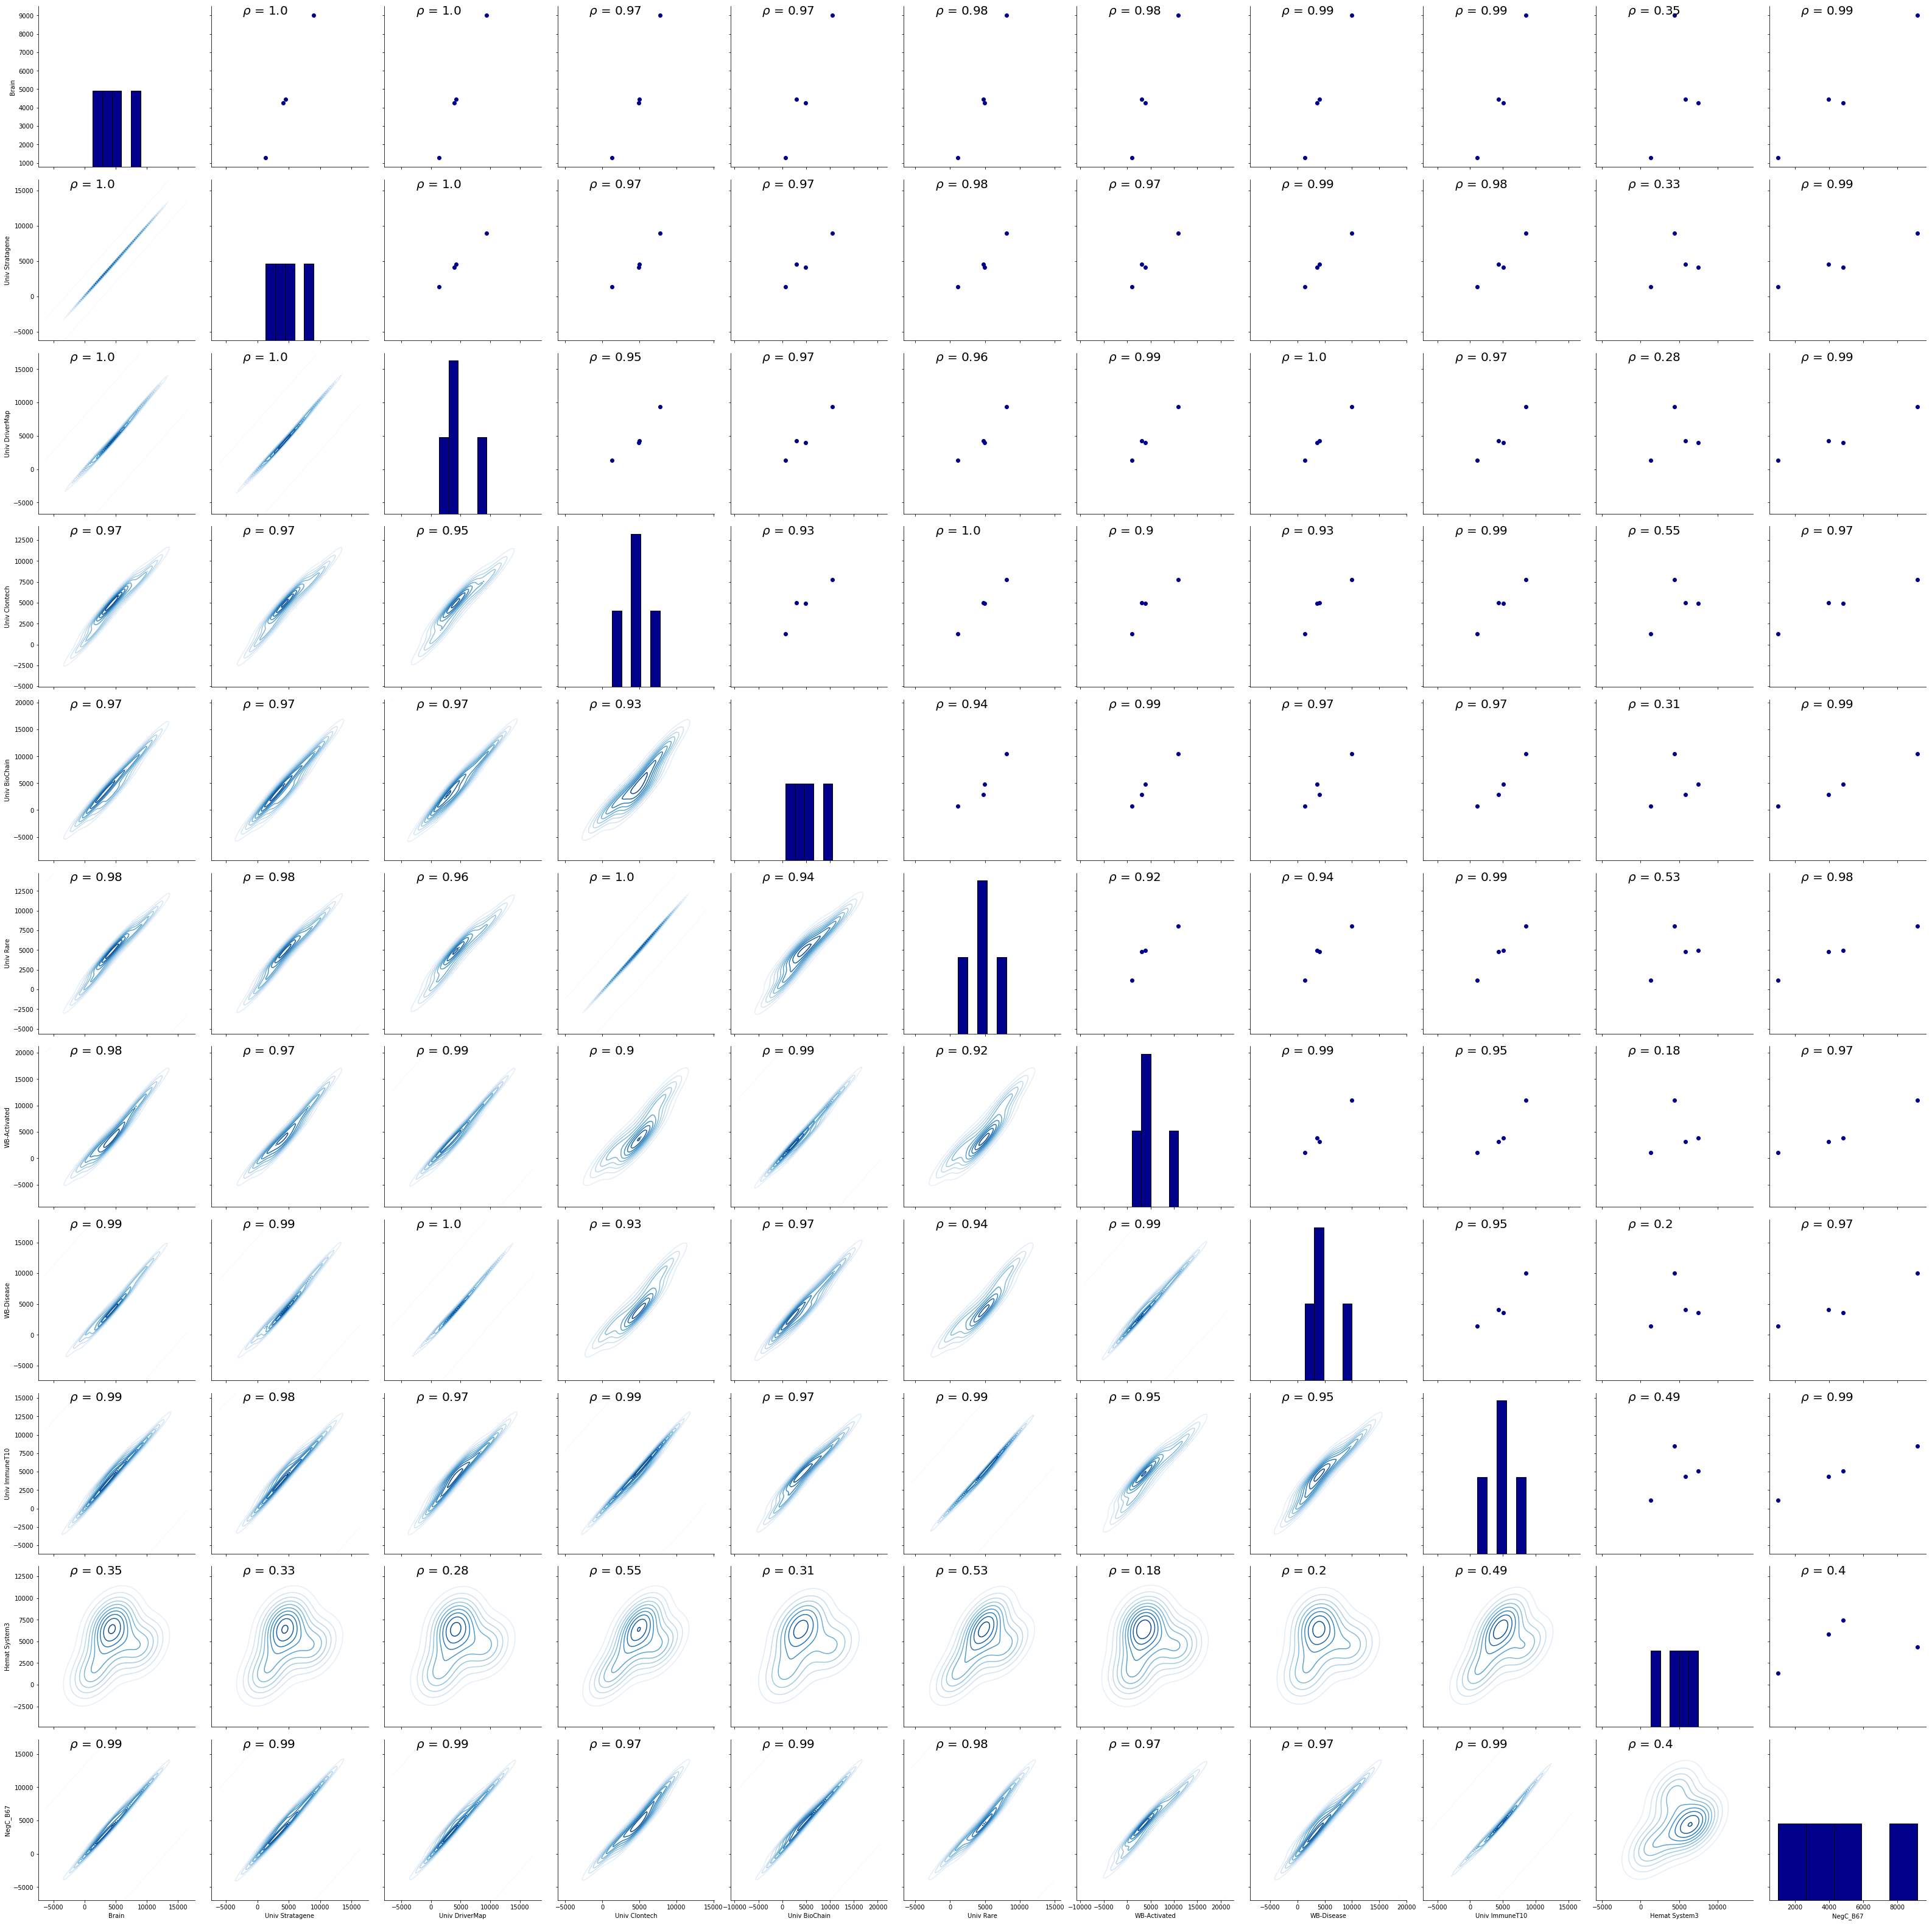

In [23]:
# Create a pair grid instance for BSA binned samples
grid = sns.PairGrid(data= binned_bsa_data, height = 4)

# Map the plots to the locations
grid = grid.map_upper(plt.scatter, color = 'darkblue')
grid = grid.map_upper(corr)
grid = grid.map_lower(sns.kdeplot, cmap = 'Blues')
grid = grid.map_lower(corr)
grid = grid.map_diag(plt.hist, bins = 5, edgecolor =  'k', color = 'darkblue');
grid.savefig("Figures_NegC/grid_BSA_bins.png", dpi = 200)

<Figure size 936x576 with 0 Axes>

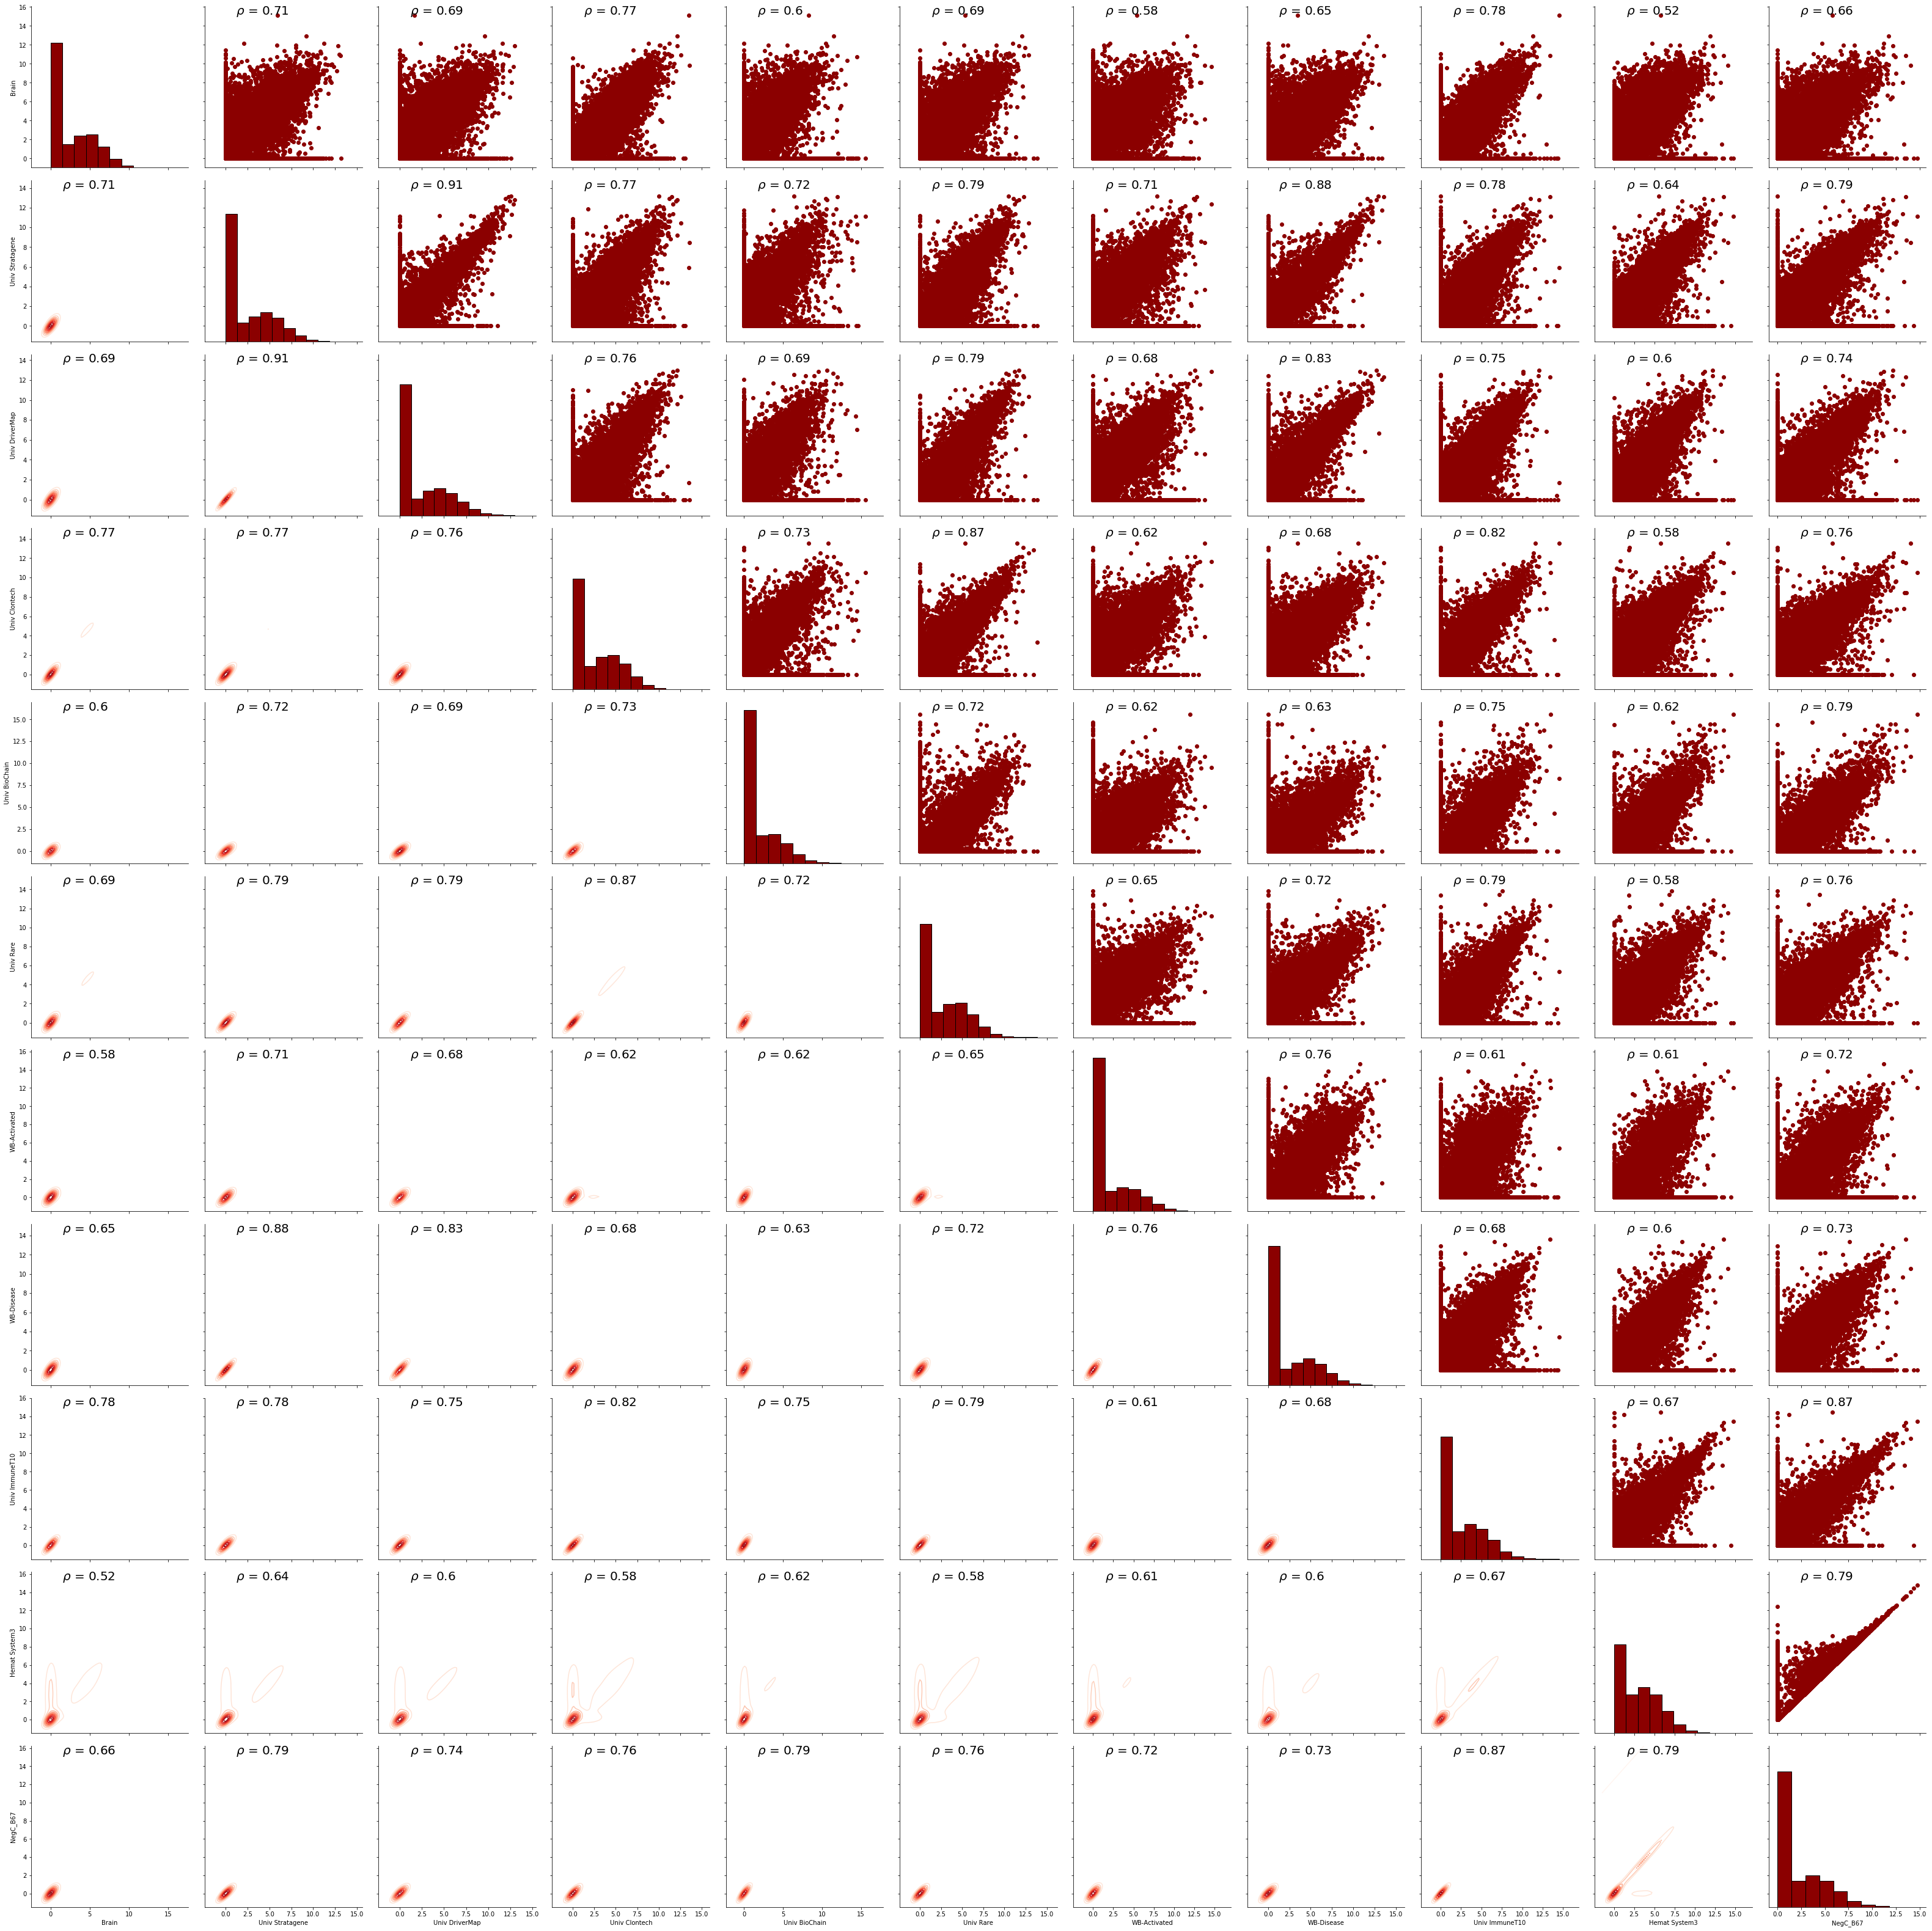

In [24]:
# Create a pair grid instance for Driver Map Logs
fig = plt.figure(figsize=(13,8))
grid = sns.PairGrid(data= driver_map_data_log_df, height = 4)

# Map the plots to the locations
grid = grid.map_upper(plt.scatter, color = 'darkred')
grid = grid.map_upper(corr)
grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')
grid = grid.map_lower(corr)
grid = grid.map_diag(plt.hist, bins = 10, edgecolor = 'k', color = 'darkred');
grid.savefig("Figures_NegC/grid_Original_log.png", dpi = 200)

<Figure size 936x576 with 0 Axes>

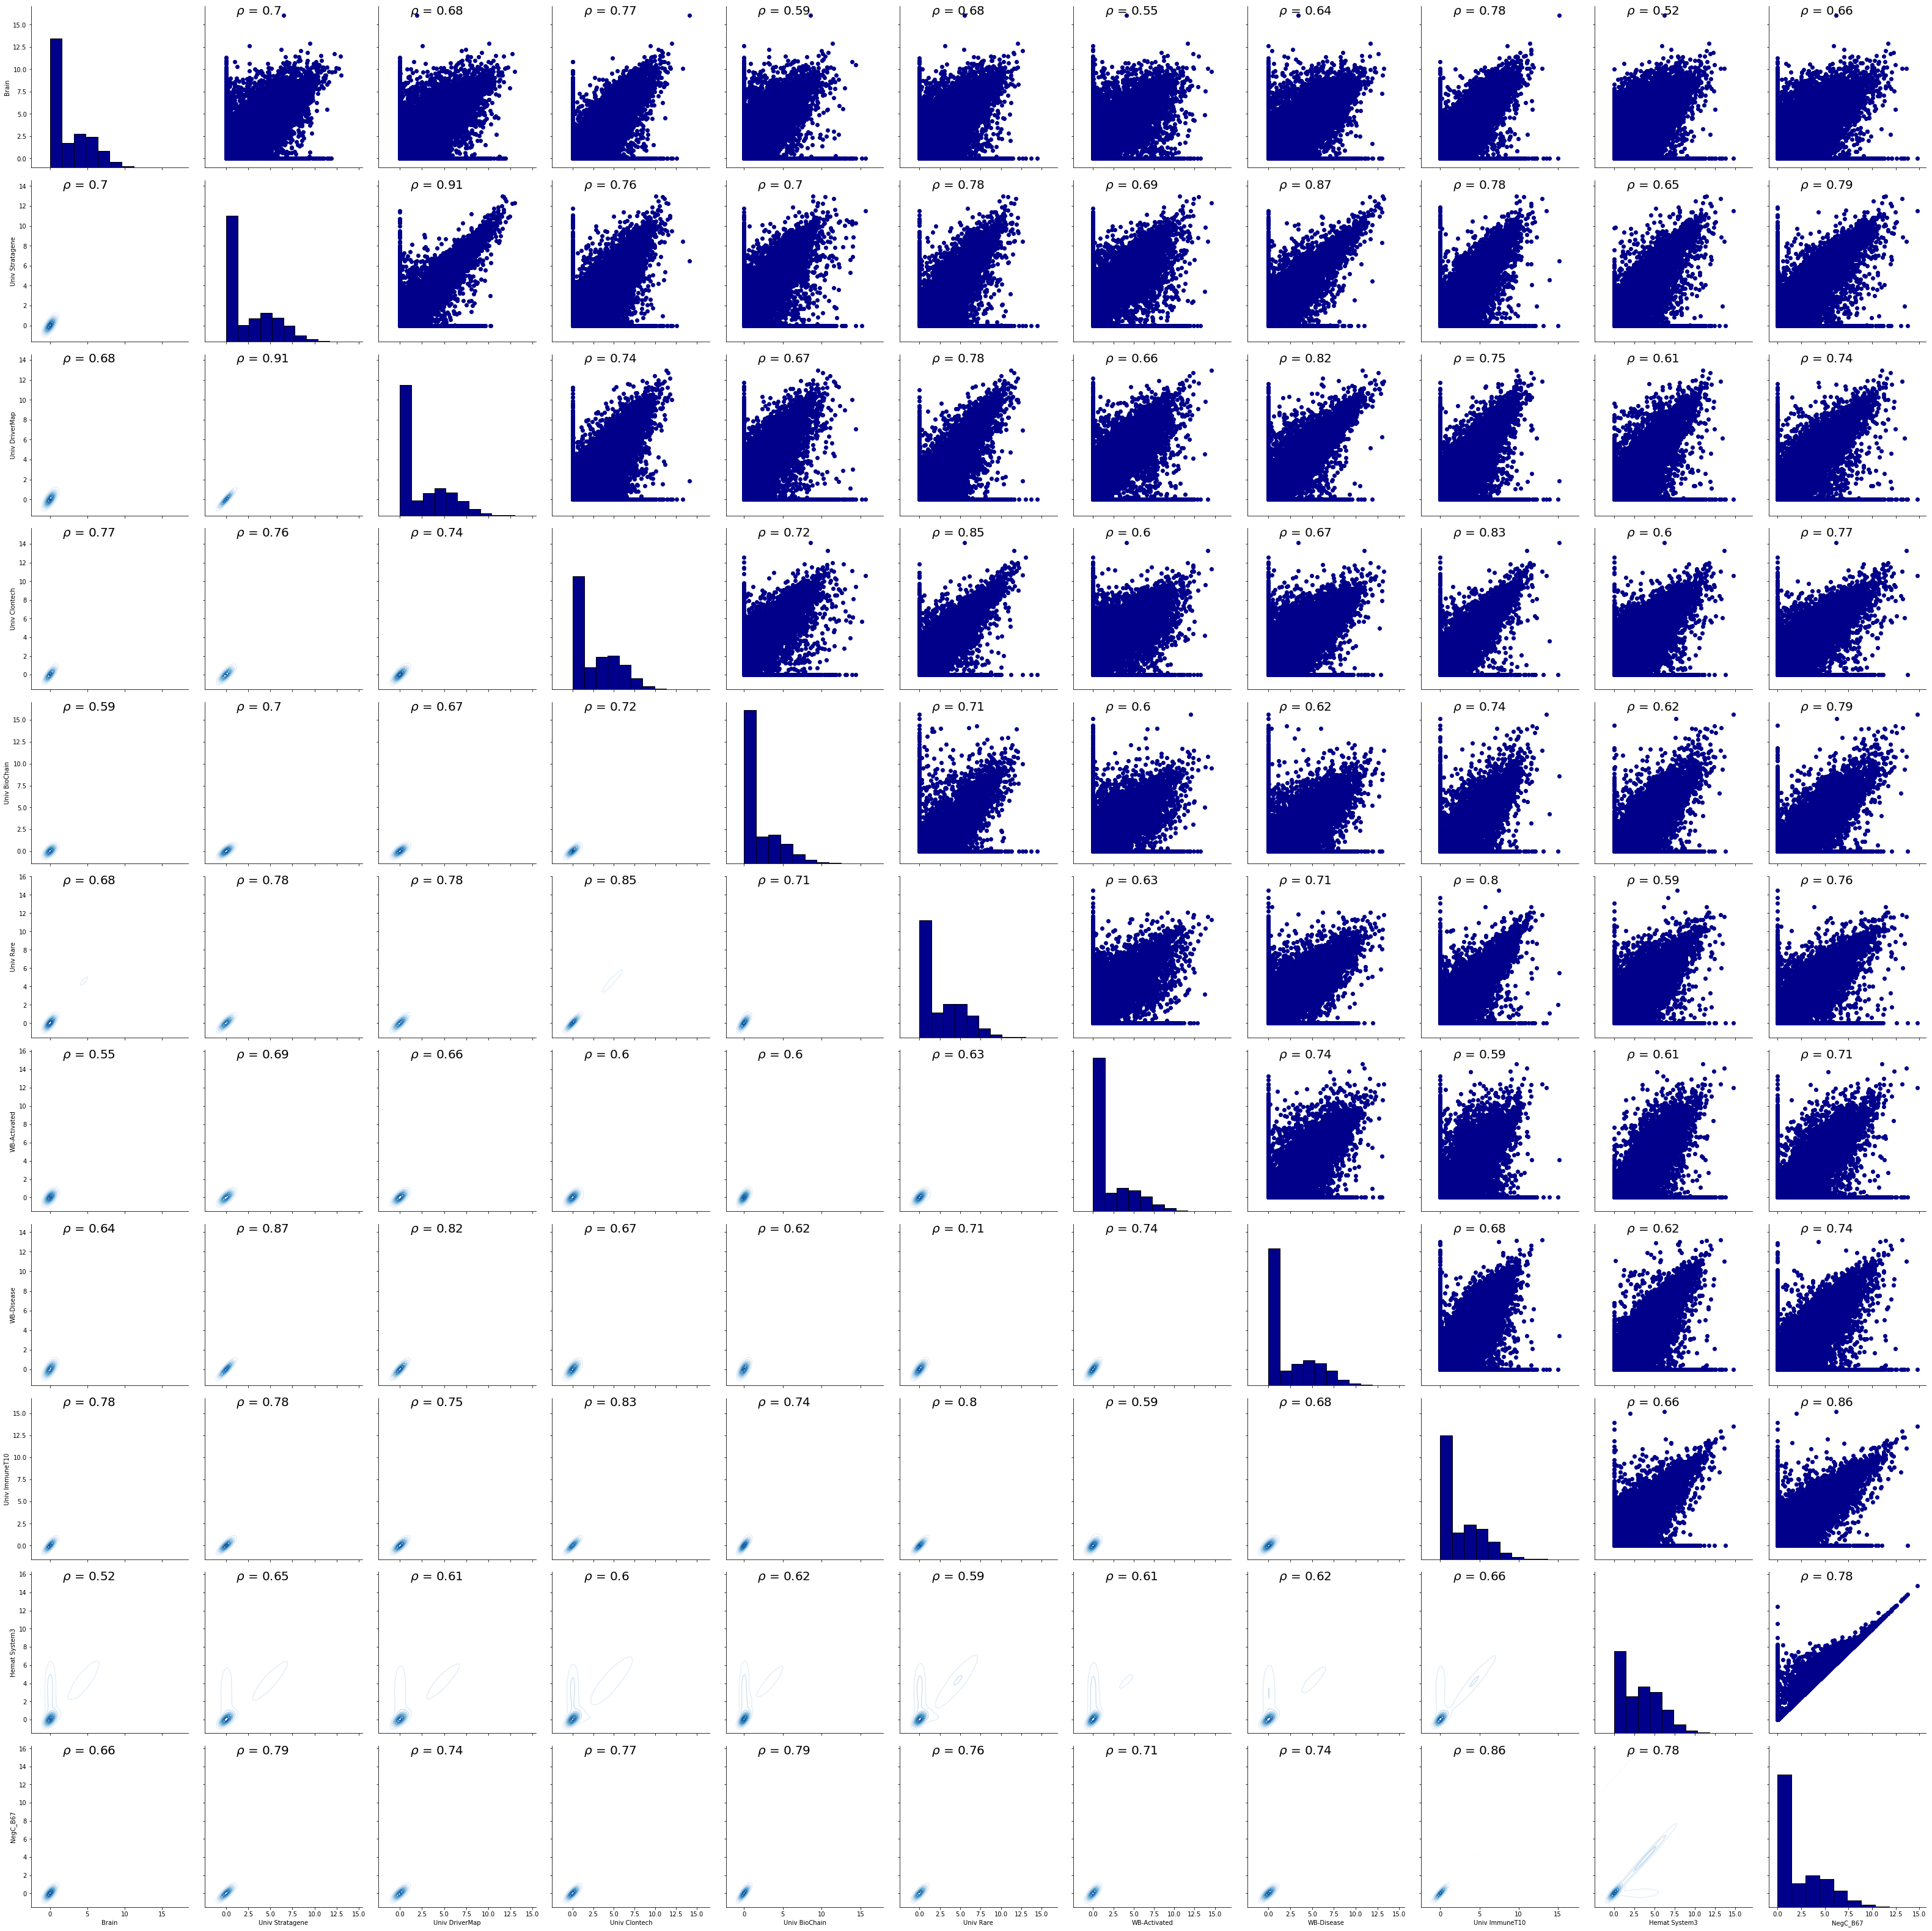

In [25]:
# Create a pair grid instance Driver Map BSA log
fig = plt.figure(figsize=(13,8))
grid = sns.PairGrid(data= driver_map_data_bsa_log_df, height = 4)

# Map the plots to the locations
grid = grid.map_upper(plt.scatter, color = 'darkblue')
grid = grid.map_upper(corr)
grid = grid.map_lower(sns.kdeplot, cmap = 'Blues')
grid = grid.map_lower(corr)
grid = grid.map_diag(plt.hist, bins = 10, edgecolor = 'k', color = 'darkblue');
grid.savefig("Figures_NegC/grid_BSA_log.png", dpi = 200)

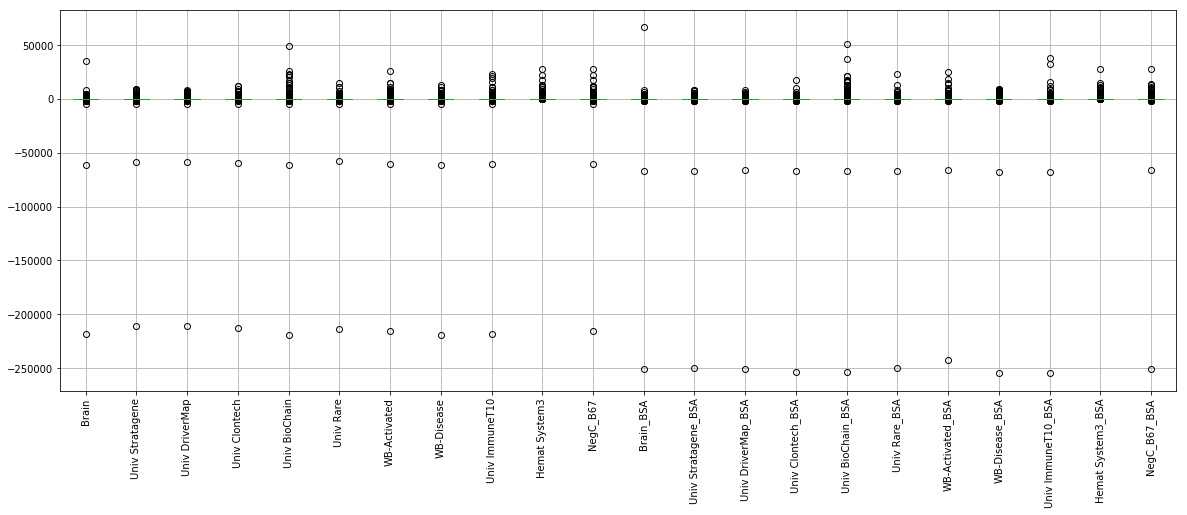

In [26]:
# Box plots to visualize outliers for TPM data

plt.figure(figsize=(20,7))
plt.subplots
driver_map_data_all_df.boxplot()
plt.xticks(rotation=90)
plt.savefig("Figures_NegC/outliers_TPM.png", dpi = 200)


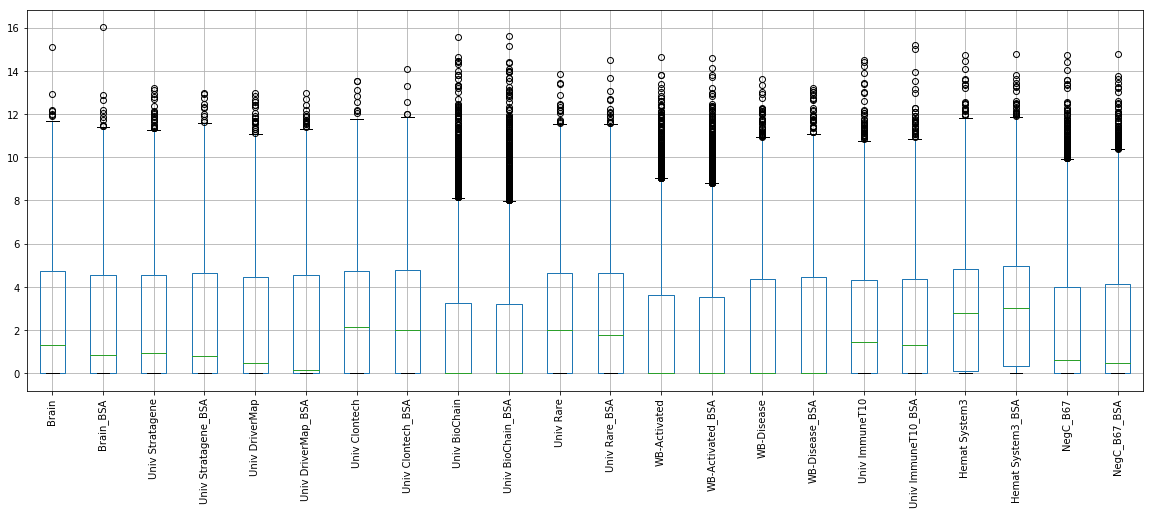

In [27]:
# Box plots to visualize outliers for log data
# a lot more outliers
plt.figure(figsize=(20,7))
plt.subplots
driver_map_data_all_log_df.boxplot()
plt.xticks(rotation=90)
plt.savefig("Figures_NegC/outliers_log.png", dpi = 200)

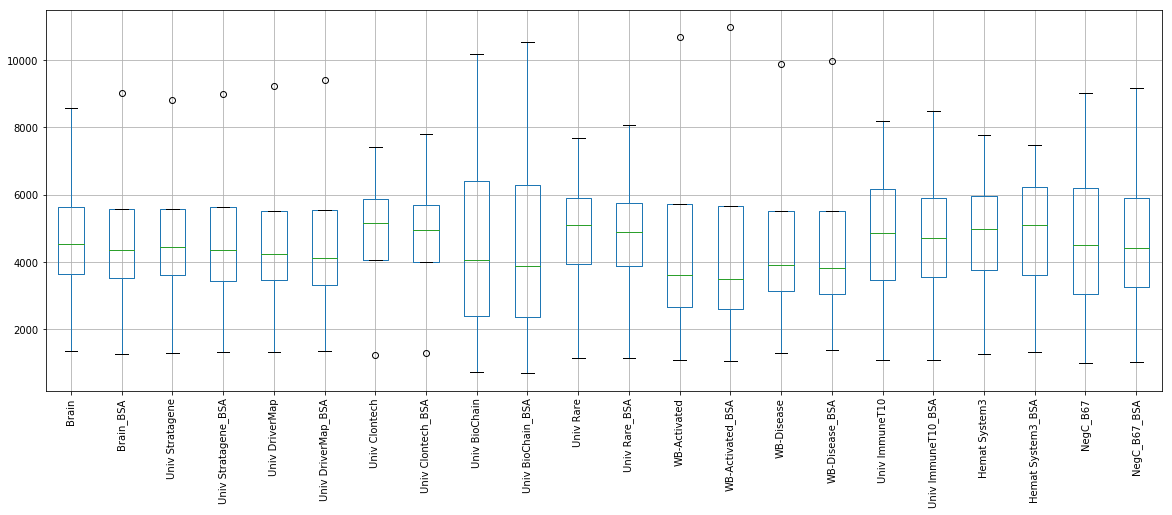

In [28]:
# Box plots to visualize outliers for binned data

plt.figure(figsize=(20,7))
plt.subplots
binned_all_dm_data.boxplot()
plt.xticks(rotation=90)
plt.savefig("Figures_NegC/outliers_bins.png", dpi = 200)

An Independent Samples t-test compares the means for two groups.


The hypothesis being tested is:

Null hypothesis (H0): u1 = u2, which translates to the mean of sample 1 is equal to the mean of sample 2
Alternative hypothesis (HA): u1 ? u2, which translates to the mean of sample 1 is not equal to the mean of sample 2

A p-value is the probability of rejecting a null-hypothesis when the hypothesis is proven true. The null hypothesis is a statement that says that there is no difference between two measures.

We are interested in p-values below 0.05(significant).

In [29]:
# t-test for binned data
idx = binned_dm_data.index.intersection(binned_bsa_data.index)
t_test_bins_df = pd.DataFrame(ttest_ind(binned_dm_data.loc[idx], binned_bsa_data.loc[idx], axis=1), 
                              index=['t-stat','p-value'], columns = bin_labels)

#Ttest_indResult(
#    statistic=array([-0.31240597,  0.66835531, -0.17359046, -0.21035294]), 
#    pvalue=array([0.75796591, 0.51154742, 0.86393227, 0.83552046]))
flip_t_test_bins_df = t_test_bins_df.transpose()

flip_t_test_bins_df.describe()
t_test_bins_df

# no real statistical difference

no read       low    medium      high
t-stat  -0.312406  0.668355 -0.173590 -0.210353
p-value  0.757966  0.511547  0.863932  0.835520

In [30]:
#t-test for log data
index = ['Original', 'BSA']

idx = driver_map_data_log_df.index.intersection(driver_map_data_bsa_log_df.index)
t_test_df = pd.DataFrame(ttest_ind(driver_map_data_log_df.loc[idx], driver_map_data_bsa_log_df.loc[idx], axis=1), 
                         index=['t-stat','p-value'], columns=gene_name_list)
flip_t_test_df = t_test_df.transpose()

flip_t_test_df = [flip_t_test_df[['p-value']] < 0.05]
#flip_t_test_df.count('False')
flip_t_test_df = flip_t_test_df[0]
#f = flip_t_test_df.drop([flip_t_test_df['p-value'] == False])

np.sum(flip_t_test_df['p-value']) # 2829 genes have statistical significance.
                                    # 468 genes have statistical significance if don't subtract NegC from Columns
#flip_t_test_df.describe()

C:\Users\hamst\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\hamst\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\hamst\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


2829

In [31]:
#t-test for TPM data
index = ['Original', 'BSA']

idx = driver_map_data_all_df.index.intersection(driver_map_data_all_df.index)
t_test_df = pd.DataFrame(ttest_ind(driver_map_data_all_df.loc[idx], driver_map_data_all_df.loc[idx], axis=1), 
                         index=['t-stat','p-value'], columns=gene_name_list)
flip_t_test_df = t_test_df.transpose()

flip_t_test_df = [flip_t_test_df[['p-value']] < 0.05]
#flip_t_test_df.count('False')
flip_t_test_df = flip_t_test_df[0]
#f = flip_t_test_df.drop([flip_t_test_df['p-value'] == False])

np.sum(flip_t_test_df['p-value']) # 2829 genes have statistical significance.
#flip_t_test_df.describe()
                                    # 0 genes have statistical significance without subtracting NegC from data

0

In [32]:
# create a new DataFrame where the values for the indices and columns align on the diagonals
# Pearson correlation between two samples

# A value greater than 0 indicates a positive association; that is, as the value of one variable increases, 
# so does the value of the other variable.

pearson_corr = pd.DataFrame(columns = driver_map_data_log_df.columns, index = driver_map_data_log_df.columns)

for col in pearson_corr.columns:
    for idx in pearson_corr.index:
        correl_signif = pearsonr(driver_map_data_log_df[col], driver_map_data_bsa_log_df[idx])
        correl = correl_signif[0]
        pearson_corr.loc[idx, col] = correl

pearson_corr.head()

Brain Univ Stratagene Univ DriverMap Univ Clontech  \
Brain            0.872801        0.613335       0.600848       0.67887   
Univ Stratagene  0.631267        0.877215       0.812207      0.684056   
Univ DriverMap   0.614173        0.812441       0.886387      0.670755   
Univ Clontech    0.680773        0.662689        0.65277      0.844619   
Univ BioChain    0.528591        0.639403       0.612961      0.649979   

                Univ BioChain Univ Rare WB-Activated WB-Disease  \
Brain                0.525643   0.58926     0.497301   0.570117   
Univ Stratagene      0.643515  0.693859     0.636052   0.793246   
Univ DriverMap       0.616885  0.699526     0.610952     0.7525   
Univ Clontech        0.640806  0.731926     0.541321   0.597092   
Univ BioChain          0.8854  0.636214     0.541346   0.563395   

                Univ ImmuneT10 Hemat System3  NegC_B67  
Brain                 0.672363      0.499767  0.566944  
Univ Stratagene       0.684156       0.63154  0.694028  
Univ DriverMap        0.659586      0.592194  0.648815  
Univ Clontech         0.707919      0.565736  0.657185  
Univ BioChain         0.662934      0.607251  0.700219

In [33]:

spearman_corr = pd.DataFrame(columns = driver_map_data_log_df.columns, index = driver_map_data_log_df.columns)

for col in spearman_corr.columns:
    for idx in spearman_corr.index:
        correl_signif = spearmanr(driver_map_data_log_df[col], driver_map_data_bsa_log_df[idx])
        correl = correl_signif[0]
        spearman_corr.loc[idx, col] = correl

spearman_corr.head()

Brain Univ Stratagene Univ DriverMap Univ Clontech  \
Brain            0.836991        0.617067       0.604616      0.659271   
Univ Stratagene  0.629509        0.836943       0.776381      0.664687   
Univ DriverMap   0.616171        0.778116       0.848176      0.648748   
Univ Clontech    0.663533        0.649209        0.63641      0.808804   
Univ BioChain    0.563933         0.65142       0.631582      0.646677   

                Univ BioChain Univ Rare WB-Activated WB-Disease  \
Brain                0.559657   0.58772     0.524127   0.581155   
Univ Stratagene      0.654902  0.674609     0.640167    0.76227   
Univ DriverMap       0.636086  0.676441     0.621114   0.727531   
Univ Clontech        0.643158  0.712491     0.543568   0.590002   
Univ BioChain        0.824369   0.64507     0.578351   0.599244   

                Univ ImmuneT10 Hemat System3  NegC_B67  
Brain                 0.664703      0.476092  0.582525  
Univ Stratagene       0.670285       0.58383  0.680739  
Univ DriverMap        0.644803       0.54805   0.63845  
Univ Clontech         0.689873      0.519394  0.647202  
Univ BioChain         0.658192      0.542695  0.684362

In [34]:

pearson_corr_bins = pd.DataFrame(columns = binned_dm_data.columns, index = binned_dm_data.columns)

for col in pearson_corr.columns:
    for idx in pearson_corr_bins.index:
        correl_signif = pearsonr(binned_dm_data[col], binned_bsa_data[idx])
        correl = correl_signif[0]
        pearson_corr_bins.loc[idx, col] = correl

pearson_corr_bins.head()

Brain Univ Stratagene Univ DriverMap Univ Clontech  \
Brain            0.998165        0.998913       0.998459      0.942649   
Univ Stratagene  0.997602        0.997325       0.997374      0.937646   
Univ DriverMap   0.990776        0.993069       0.998122      0.914015   
Univ Clontech    0.984814         0.97955       0.962403      0.992973   
Univ BioChain    0.962709        0.975827       0.983201      0.900224   

                Univ BioChain Univ Rare WB-Activated WB-Disease  \
Brain                0.967757  0.955472     0.978022   0.991625   
Univ Stratagene      0.961257  0.950361     0.976118   0.992538   
Univ DriverMap        0.96661  0.930003     0.987315   0.998611   
Univ Clontech         0.92932   0.99529     0.911594   0.935076   
Univ BioChain        0.998767  0.920707      0.99176   0.975302   

                Univ ImmuneT10 Hemat System3  NegC_B67  
Brain                 0.963649      0.384325  0.977023  
Univ Stratagene       0.956565      0.367109  0.970594  
Univ DriverMap         0.94407      0.314041  0.967455  
Univ Clontech         0.982509       0.57174  0.964739  
Univ BioChain          0.95899       0.36971  0.988509

In [40]:
columns = ['Brain', 'Univ Stratagene', 'Univ DriverMap','Univ Clontech', 'Univ BioChain', 
                              'Univ Rare', 'WB-Activated','WB-Disease', 'Univ ImmuneT10', 'Hemat System3', 'NegC_B67']

# ANOVA test to compare means of samples
anova_t_df = pd.DataFrame(columns = driver_map_data_log_df.columns, index = ['Statistic','p-value'])

for col in anova_t_df.columns:
    for idx in anova_t_df.index:
        correl_signif = stats.f_oneway(driver_map_data_log_df,driver_map_data_bsa_log_df)
        statistic = correl_signif[0]
        p_value = correl_signif[1]

df_original_anova = pd.DataFrame([statistic, p_value], columns=columns, index = ['Statistic','p-value'])
df_original_anova

Brain  Univ Stratagene  Univ DriverMap  Univ Clontech  \
Statistic  17.376639         0.707142        0.119078       0.819490   
p-value     0.000031         0.400400        0.730039       0.365335   

           Univ BioChain  Univ Rare  WB-Activated  WB-Disease  Univ ImmuneT10  \
Statistic       2.374372   3.002645      3.558963    0.359419        0.059606   
p-value         0.123350   0.083137      0.059232    0.548833        0.807121   

           Hemat System3  NegC_B67  
Statistic   2.606668e+01  3.544364  
p-value     3.314164e-07  0.059756

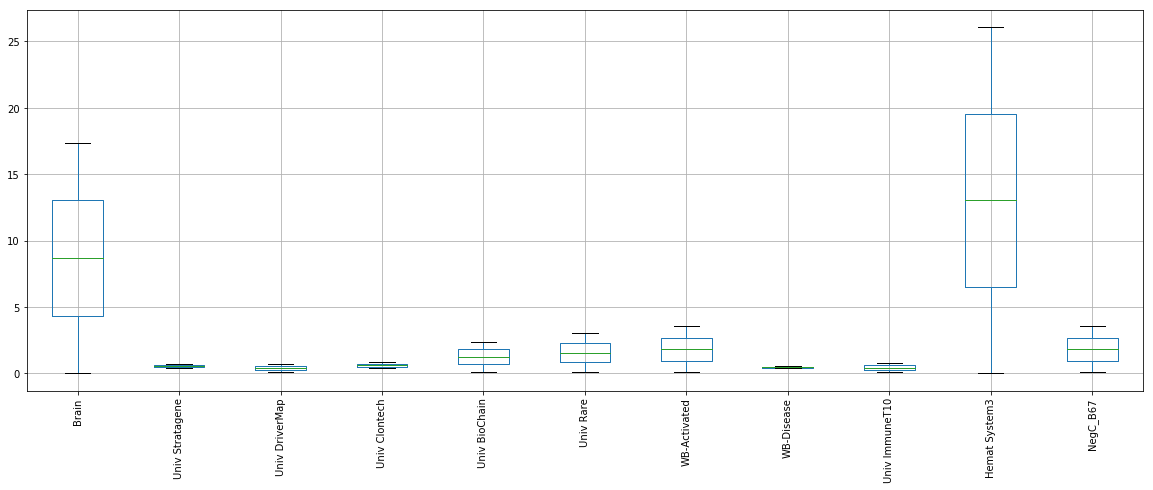

In [41]:
#graphing anova results
plt.figure(figsize=(20,7))
plt.subplots
df_original_anova.boxplot()
plt.xticks(rotation=90)
plt.savefig("Figures_NegC/anova_results.png", dpi = 200)

Can possibly look at log10 to clean up even more

with np.errstate(divide='ignore'):
    driver_map_data_all_log10_df = np.log10(driver_map_data_all_df)
replace negative values with 0    
driver_map_data_all_log10_df[driver_map_data_all_log10_df < 0 ] = 0
repleca NaN values  with 0
driver_map_data_all_log10_df[driver_map_data_all_log10_df.isna() ] = 0

Box plots to visualize outliers for log data
a lot more outliers

plt.figure(figsize=(20,7))
plt.subplots
driver_map_data_all_log10_df.boxplot()
plt.xticks(rotation=90)